# Loading the required libraries 

In [154]:
import warnings
warnings.filterwarnings('ignore')
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import datetime
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula.api import ols
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# importing metrics 

from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Set max rows and columns display options
pd.set_option("display.max_rows",10000)
pd.set_option("display.max_columns",500)

In [2]:
# set the working directory
os.chdir('D:/UPGRAD COURSE/ML_2/Advanced_Regression/Advanced-Regression-main/House Prediction Assignment')
os.getcwd()

'D:\\UPGRAD COURSE\\ML_2\\Advanced_Regression\\Advanced-Regression-main\\House Prediction Assignment'

In [3]:
House = pd.read_csv('train.csv')

In [4]:
House.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [5]:
House.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
House.describe(include='all')

Id   MSSubClass MSZoning  LotFrontage        LotArea Street  \
count   1460.000000  1460.000000     1460  1201.000000    1460.000000   1460   
unique          NaN          NaN        5          NaN            NaN      2   
top             NaN          NaN       RL          NaN            NaN   Pave   
freq            NaN          NaN     1151          NaN            NaN   1454   
mean     730.500000    56.897260      NaN    70.049958   10516.828082    NaN   
std      421.610009    42.300571      NaN    24.284752    9981.264932    NaN   
min        1.000000    20.000000      NaN    21.000000    1300.000000    NaN   
25%      365.750000    20.000000      NaN    59.000000    7553.500000    NaN   
50%      730.500000    50.000000      NaN    69.000000    9478.500000    NaN   
75%     1095.250000    70.000000      NaN    80.000000   11601.500000    NaN   
max     1460.000000   190.000000      NaN   313.000000  215245.000000    NaN   

       Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
count     91     1460        1460      1460      1460      1460         1460   
unique     2        4           4         2         5         3           25   
top     Grvl      Reg         Lvl    AllPub    Inside       Gtl        NAmes   
freq      50      925        1311      1459      1052      1382          225   
mean     NaN      NaN         NaN       NaN       NaN       NaN          NaN   
std      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
min      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
25%      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
50%      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
75%      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
max      NaN      NaN         NaN       NaN       NaN       NaN          NaN   

       Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  \
count        1460       1460     1460       1460  1460.000000  1460.000000   
unique          9          8        5          8          NaN          NaN   
top          Norm       Norm     1Fam     1Story          NaN          NaN   
freq         1260       1445     1220        726          NaN          NaN   
mean          NaN        NaN      NaN        NaN     6.099315     5.575342   
std           NaN        NaN      NaN        NaN     1.382997     1.112799   
min           NaN        NaN      NaN        NaN     1.000000     1.000000   
25%           NaN        NaN      NaN        NaN     5.000000     5.000000   
50%           NaN        NaN      NaN        NaN     6.000000     5.000000   
75%           NaN        NaN      NaN        NaN     7.000000     6.000000   
max           NaN        NaN      NaN        NaN    10.000000     9.000000   

          YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
count   1460.000000   1460.000000      1460     1460        1460        1460   
unique          NaN           NaN         6        8          15          16   
top             NaN           NaN     Gable  CompShg     VinylSd     VinylSd   
freq            NaN           NaN      1141     1434         515         504   
mean    1971.267808   1984.865753       NaN      NaN         NaN         NaN   
std       30.202904     20.645407       NaN      NaN         NaN         NaN   
min     1872.000000   1950.000000       NaN      NaN         NaN         NaN   
25%     1954.000000   1967.000000       NaN      NaN         NaN         NaN   
50%     1973.000000   1994.000000       NaN      NaN         NaN         NaN   
75%     2000.000000   2004.000000       NaN      NaN         NaN         NaN   
max     2010.000000   2010.000000       NaN      NaN         NaN         NaN   

       MasVnrType   MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
count        1452  1452.000000      1460      1460       1460     1423   
unique          4          NaN         4         

In [7]:
House.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [8]:
round(100*(House.isnull().sum()/len(House)), 2).sort_values(ascending=False)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageCond        5.55
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageQual        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
Utilities         0.00
YearRemodAdd      0.00
MSSubClass        0.00
Foundation        0.00
ExterCond         0.00
ExterQual         0.00
Exterior2nd       0.00
Exterior1st       0.00
RoofMatl          0.00
RoofStyle         0.00
YearBuilt         0.00
LotConfig         0.00
OverallCond       0.00
OverallQual       0.00
HouseStyle        0.00
BldgType          0.00
Condition2        0.00
BsmtFinSF1        0.00
MSZoning          0.00
LotArea           0.00
Street            0.00
Condition1        0.00
Neighborhood      0.00
LotShape          0.00
LandContour

# Data Cleaning

- **Delete High Null Columns:** Dropping columns which are having more than 50% missing values
- **Missing Value Treatement:** Treaing missing values by imputing for columns with missing values less than or equal to 50%
    - For the numerical columns, imputing with `mean` value, if `no outliers` present
    - If `outlier exists`, we will impute those number columns with `median`
    - For categorical columns, `dropping highly skwed` columns
    - For meaning full missing, creating `new category` for imputing missing value

In [311]:
# Dropping variables with more than 50% of NA values
variables= House.columns[((House.isnull().sum()/len(House.index))*100 ) >50]
variables

Index([], dtype='object')

In [10]:
#removing Id column as it cant be helped in predictions
House.drop(variables, axis=1, inplace=True)

In [11]:
#droping the id column
House.drop(['Id'], axis=1, inplace=True)

In [12]:
House.shape

(1460, 76)

In [13]:
round(100*(House.isnull().sum()/len(House)), 2).sort_values(ascending=False)

FireplaceQu      47.26
LotFrontage      17.74
GarageCond        5.55
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageQual        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrType        0.55
MasVnrArea        0.55
Electrical        0.07
YearBuilt         0.00
Exterior2nd       0.00
Exterior1st       0.00
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
RoofMatl          0.00
RoofStyle         0.00
YearRemodAdd      0.00
SalePrice         0.00
OverallCond       0.00
OverallQual       0.00
HouseStyle        0.00
BldgType          0.00
Condition2        0.00
Condition1        0.00
Neighborhood      0.00
LandSlope         0.00
LotConfig         0.00
Utilities         0.00
LandContour       0.00
LotShape          0.00
Street            0.00
LotArea           0.00
MSZoning          0.00
BsmtFinSF1        0.00
Heating           0.00
BsmtFinSF2        0.00
EnclosedPor

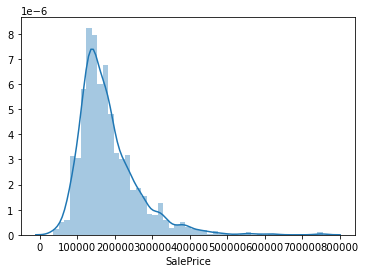

In [14]:
# Introspecting the target value SalePrice
sns.distplot(House['SalePrice'])

In [15]:
# Checking statistical information (min, max, mean, median, percentiles etc.) of dataset
House.describe(percentiles = [0.25, 0.50, 0.75, 0.95])

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
95%     160.000000   107.000000   17401.150000     8.000000     8.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315   
std      30.202904     20.645407   181.066207   456.098091   161.319273   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000   
95%    2007.000000   2007.000000   456.000000  1274.000000   396.200000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean    567.240411  1057.429452  1162.626712   346.992466      5.844521   
std     441.866955   438.705324   386.587738   436.528436     48.623081   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     223.000000   795.750000   882.000000     0.000000      0.000000   
50%     477.500000   991.500000  1087.000000     0.000000      0.000000   
75%     808.000000  1298.250000  1391.250000   728.000000      0.000000   
95%    1468.000000  1753.000000  1831.250000  1141.050000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean   1515.463699      0.425342      0.057534     1.565068     0.382877   
std     525.480383      0.518911      0.238753     0.550916     0.502885   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1129.500000      0.000000      0.000000     1.000000     0.000000   
50%    1464.000000      0.000000      0.000000     2.000000     0.000000   
75%    1776.750000      1.000000      0.000000     2.000000     1.000000   
95%    2466.100000      1.000000      1.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count   1460.000000   1460.000000   1460.000000  1460.000000  1379.000000   
mean       2.866438      1.046575      6.517808     0.613014  1978.506164   
std        0.815778      0.220338      1.625393     0.644666    24.689725   
min        0.000000      0.000000      2.000000     0.000000  1900.000000   
25%        2.000000      1.000000      5.000000     0.000000  1961.000000   
50%        3.000000      1.000000      6.000000     1.000000  1980.000000   
75%        3.000000      1.000000      7.000000     1.000000  2002.000000   
95%        4.000000      1.000000     10.000000     2.000000  2007.000000   
max        8.000000      3.000000     14.000000     3.000000  2010.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean      1.767123   472.980137    94.244521    46.660274    

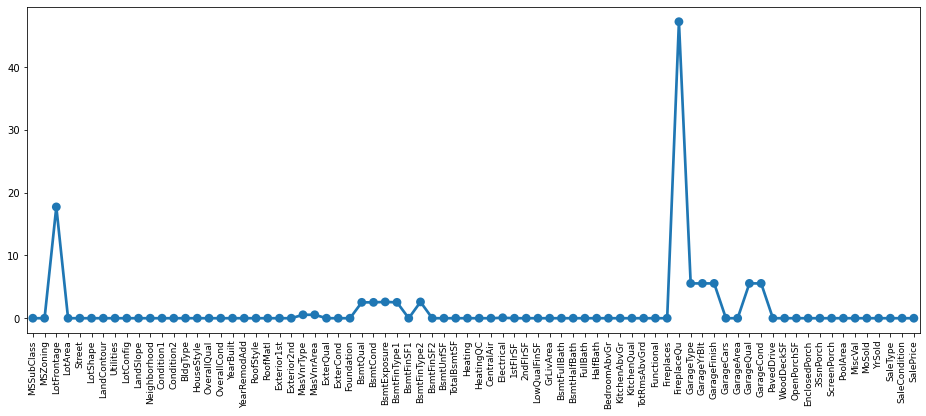

In [16]:
plt.figure(figsize = (16,6))

sns.pointplot(House.columns, round((House.isnull().sum()/len(House.index))*100,2))

# Setting X- axis and Y- axix display size
plt.xticks(rotation =90,fontsize =9)

plt.show()

In [17]:
round(100*(House.isnull().sum(axis = 1)/House.shape[1]),2)

0        1.32
1        0.00
2        0.00
3        0.00
4        0.00
5        1.32
6        0.00
7        1.32
8        0.00
9        0.00
10       1.32
11       0.00
12       2.63
13       0.00
14       1.32
15       1.32
16       1.32
17       7.89
18       1.32
19       1.32
20       0.00
21       0.00
22       0.00
23       0.00
24       1.32
25       0.00
26       1.32
27       0.00
28       0.00
29       1.32
30       1.32
31       2.63
32       1.32
33       0.00
34       0.00
35       0.00
36       1.32
37       0.00
38       1.32
39      14.47
40       0.00
41       0.00
42       2.63
43       2.63
44       1.32
45       0.00
46       0.00
47       1.32
48       7.89
49       1.32
50       2.63
51       0.00
52       1.32
53       0.00
54       0.00
55       0.00
56       1.32
57       1.32
58       0.00
59       1.32
60       1.32
61       1.32
62       0.00
63       1.32
64       2.63
65       0.00
66       1.32
67       1.32
68       1.32
69       0.00
70       0.00
71    

In [18]:
round((House.isnull().sum()/len(House.index))*100,3).sort_values(ascending=False)

FireplaceQu      47.260
LotFrontage      17.740
GarageCond        5.548
GarageType        5.548
GarageYrBlt       5.548
GarageFinish      5.548
GarageQual        5.548
BsmtExposure      2.603
BsmtFinType2      2.603
BsmtFinType1      2.534
BsmtCond          2.534
BsmtQual          2.534
MasVnrType        0.548
MasVnrArea        0.548
Electrical        0.068
YearBuilt         0.000
Exterior2nd       0.000
Exterior1st       0.000
ExterQual         0.000
ExterCond         0.000
Foundation        0.000
RoofMatl          0.000
RoofStyle         0.000
YearRemodAdd      0.000
SalePrice         0.000
OverallCond       0.000
OverallQual       0.000
HouseStyle        0.000
BldgType          0.000
Condition2        0.000
Condition1        0.000
Neighborhood      0.000
LandSlope         0.000
LotConfig         0.000
Utilities         0.000
LandContour       0.000
LotShape          0.000
Street            0.000
LotArea           0.000
MSZoning          0.000
BsmtFinSF1        0.000
Heating         

In [19]:
#seperating columns based on their datatype
House_categorical =House.select_dtypes(include=['object'])
House_categorical.head()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd       None        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ         NaN     Attchd   
1          Y      SBrkr          TA        Typ          TA     Attchd   
2          Y      SBrkr          Gd        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Detchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive SaleType SaleCondition  
0          RFn         TA         TA          Y       WD        Normal  
1          RFn         TA         TA          Y       WD        Normal  
2          RFn         TA         TA          Y       WD        Normal  
3          Unf         TA         TA          Y       WD       Abnorml  
4          RFn         TA         TA          Y       WD        Normal

In [20]:
#seperating columns based on their datatype
House_numeric =House.select_dtypes(exclude=['object'])
House_numeric.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

In [21]:
print("Categorical Features : \n {} \n\n".format(House_categorical))
print("Numerical Features : \n {} ".format(House_numeric))

Categorical Features : 
      MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   
5          RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
6          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
7          RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
8          RM   Pave      Reg         Lvl    AllPub    Inside       Gtl   
9          RL   Pave      Reg         Lvl    AllPub    Corner       Gtl   
10         RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
11         RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   


In [22]:
House_categorical.describe(include='all')

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
count      1460   1460     1460        1460      1460      1460      1460   
unique        5      2        4           4         2         5         3   
top          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
freq       1151   1454      925        1311      1459      1052      1382   

       Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle  \
count          1460       1460       1460     1460       1460      1460   
unique           25          9          8        5          8         6   
top           NAmes       Norm       Norm     1Fam     1Story     Gable   
freq            225       1260       1445     1220        726      1141   

       RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond  \
count      1460        1460        1460       1452      1460      1460   
unique        8          15          16          4         4         5   
top     CompShg     VinylSd     VinylSd       None        TA        TA   
freq       1434         515         504        864       906      1282   

       Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  \
count        1460     1423     1423         1422         1423         1422   
unique          6        4        4            4            6            6   
top         PConc       TA       TA           No          Unf          Unf   
freq          647      649     1311          953          430         1256   

       Heating HeatingQC CentralAir Electrical KitchenQual Functional  \
count     1460      1460       1460       1459        1460       1460   
unique       6         5          2          5           4          7   
top       GasA        Ex          Y      SBrkr          TA        Typ   
freq      1428       741       1365       1334         735       1360   

       FireplaceQu GarageType GarageFinish GarageQual GarageCond PavedDrive  \
count          770       1379         1379       1379       1379       1460   
unique           5          6            3          5          5          3   
top             Gd     Attchd          Unf         TA         TA          Y   
freq           380        870          605       1311       1326       1340   

       SaleType SaleCondition  
count      1460          1460  
unique        9             6  
top          WD        Normal  
freq       1267          1198

In [23]:
for column in House_categorical.columns:
    print(column+" "+str(round(100 * (House_categorical[column].isnull().sum()/len(House_categorical[column].index)), 2)))

MSZoning 0.0
Street 0.0
LotShape 0.0
LandContour 0.0
Utilities 0.0
LotConfig 0.0
LandSlope 0.0
Neighborhood 0.0
Condition1 0.0
Condition2 0.0
BldgType 0.0
HouseStyle 0.0
RoofStyle 0.0
RoofMatl 0.0
Exterior1st 0.0
Exterior2nd 0.0
MasVnrType 0.55
ExterQual 0.0
ExterCond 0.0
Foundation 0.0
BsmtQual 2.53
BsmtCond 2.53
BsmtExposure 2.6
BsmtFinType1 2.53
BsmtFinType2 2.6
Heating 0.0
HeatingQC 0.0
CentralAir 0.0
Electrical 0.07
KitchenQual 0.0
Functional 0.0
FireplaceQu 47.26
GarageType 5.55
GarageFinish 5.55
GarageQual 5.55
GarageCond 5.55
PavedDrive 0.0
SaleType 0.0
SaleCondition 0.0


UNIVARIATE ANALYSIS

In [24]:
House_categorical["FireplaceQu"].describe() 

count     770
unique      5
top        Gd
freq      380
Name: FireplaceQu, dtype: object

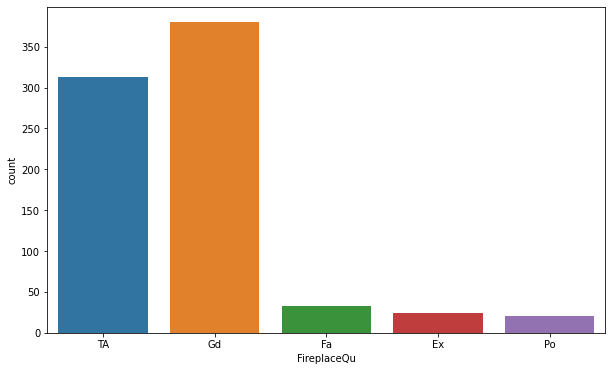

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(House_categorical["FireplaceQu"])

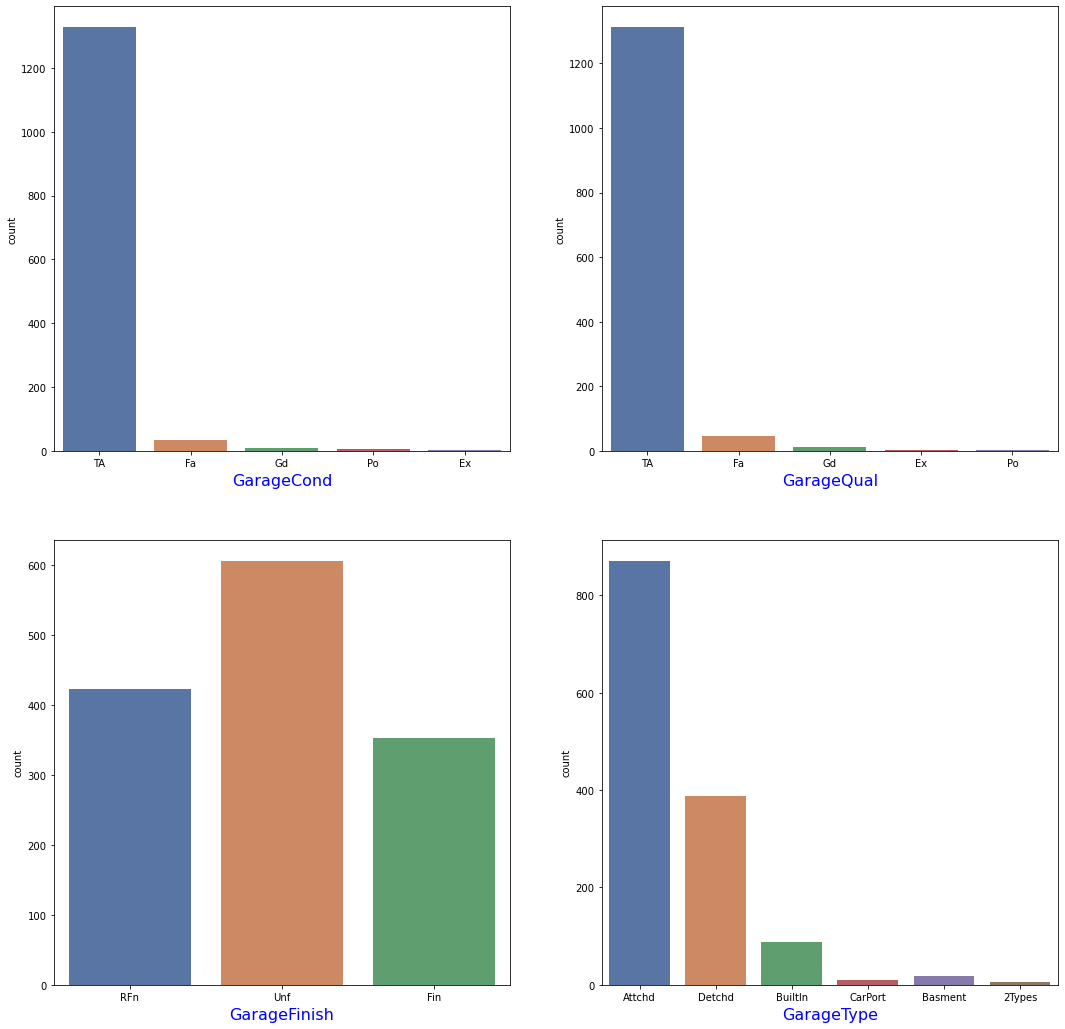

In [26]:
plt.figure(figsize = (18,18))

plt.subplot(2,2,1)
sns.countplot(House_categorical['GarageCond'], palette = 'deep')
plt.xlabel('GarageCond',fontsize = 16, color = 'blue', labelpad = 5)

plt.subplot(2,2,2)
sns.countplot(House_categorical['GarageQual'], palette = 'deep')
plt.xlabel('GarageQual',fontsize = 16, color = 'blue', labelpad = 5)

plt.subplot(2,2,3)
sns.countplot(House_categorical['GarageFinish'], palette = 'deep')
plt.xlabel('GarageFinish',fontsize = 16, color = 'blue', labelpad = 5)

plt.subplot(2,2,4)
sns.countplot(House_categorical['GarageType'], palette = 'deep')
plt.xlabel('GarageType',fontsize = 16, color = 'blue', labelpad = 5)

plt.show()

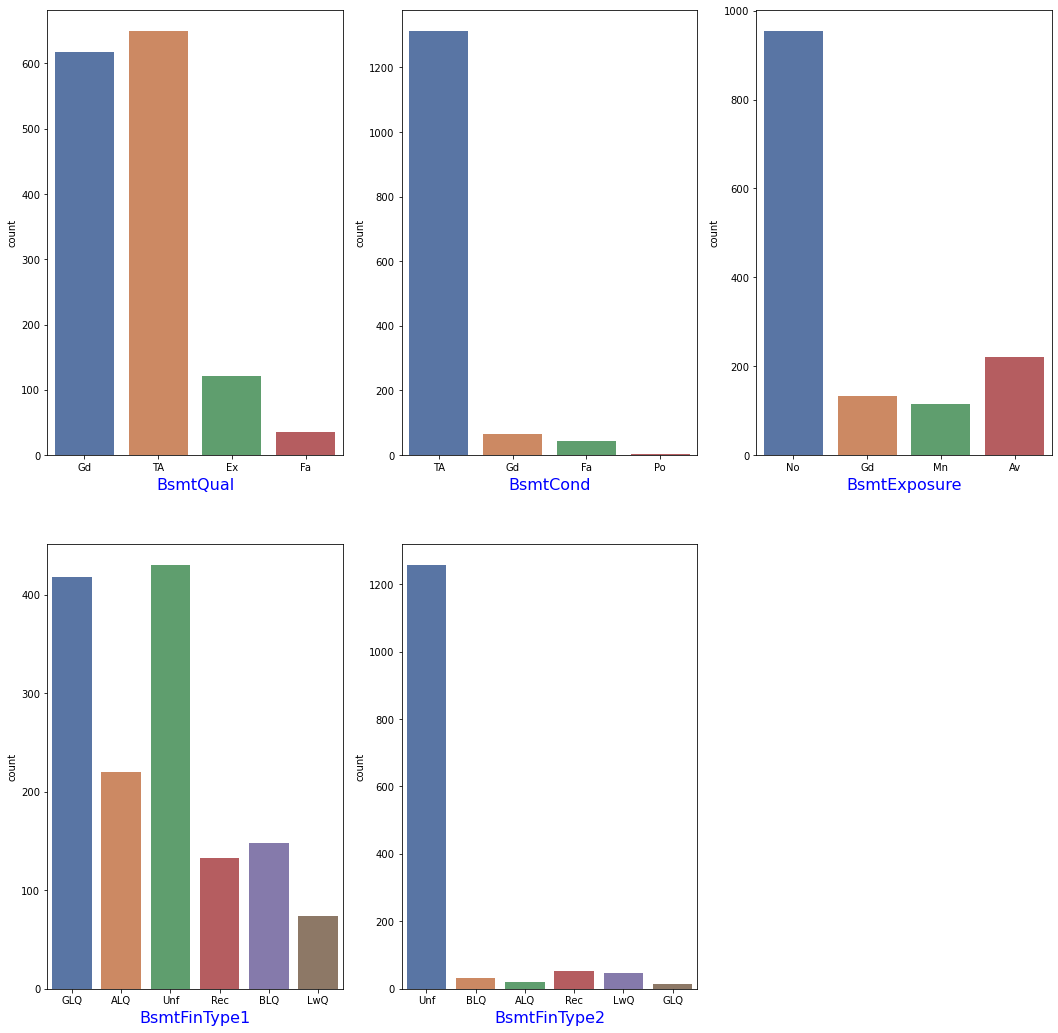

In [27]:
plt.figure(figsize = (18,18))

plt.subplot(2,3,1)
sns.countplot(House_categorical['BsmtQual'], palette = 'deep')
plt.xlabel('BsmtQual',fontsize = 16, color = 'blue', labelpad = 5)

plt.subplot(2,3,2)
sns.countplot(House_categorical['BsmtCond'], palette = 'deep')
plt.xlabel('BsmtCond',fontsize = 16, color = 'blue', labelpad = 5)

plt.subplot(2,3,3)
sns.countplot(House_categorical['BsmtExposure'], palette = 'deep')
plt.xlabel('BsmtExposure',fontsize = 16, color = 'blue', labelpad = 5)

plt.subplot(2,3,4)
sns.countplot(House_categorical['BsmtFinType1'], palette = 'deep')
plt.xlabel('BsmtFinType1',fontsize = 16, color = 'blue', labelpad = 5)

plt.subplot(2,3,5)
sns.countplot(House_categorical['BsmtFinType2'], palette = 'deep')
plt.xlabel('BsmtFinType2',fontsize = 16, color = 'blue', labelpad = 5)

plt.show()

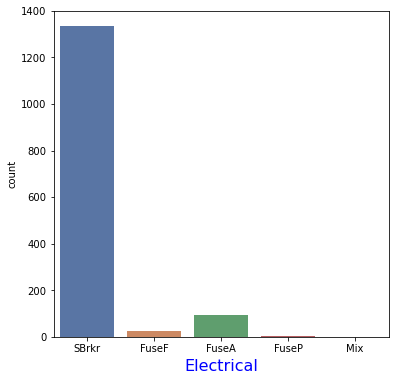

In [28]:
plt.figure(figsize = (6,6))
sns.countplot(House_categorical['Electrical'], palette = 'deep')
plt.xlabel('Electrical',fontsize = 16, color = 'blue', labelpad = 5)
plt.show()

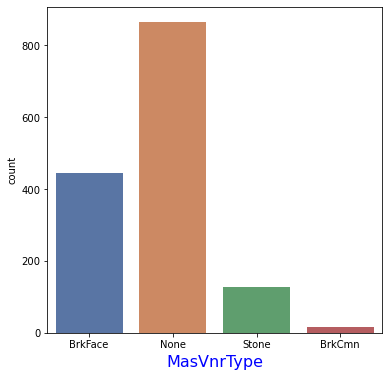

In [29]:
plt.figure(figsize = (6,6))
sns.countplot(House_categorical['MasVnrType'], palette = 'deep')
plt.xlabel('MasVnrType',fontsize = 16, color = 'blue', labelpad = 5)
plt.show()

In [30]:
# Replacing null with No, when the house doesn't have the basement
House_categorical['BsmtExposure'] = House_categorical['BsmtExposure'].fillna('No')
House_categorical['BsmtFinType2'] = House_categorical['BsmtFinType2'].fillna('No')
House_categorical['BsmtFinType1'] = House_categorical['BsmtFinType1'].fillna('No')
House_categorical['BsmtCond'] = House_categorical['BsmtCond'].fillna('No')
House_categorical['BsmtQual'] = House_categorical['BsmtQual'].fillna('No')

# Replacing null with mode value
# MasVnrType : only 8 none values
# Electrical : only 1 none values
House_categorical['MasVnrType'] = House_categorical['MasVnrType'].fillna(House_categorical['MasVnrType'].mode()[0])
House_categorical['Electrical'] = House_categorical['Electrical'].fillna(House_categorical['Electrical'].mode()[0])

# Replacing null with No, when the house doesn't have the garrage
House_categorical['GarageType'] = House_categorical['GarageType'].fillna('No')
House_categorical['GarageFinish'] = House_categorical['GarageFinish'].fillna('No')
House_categorical['GarageCond'] = House_categorical['GarageCond'].fillna('No')
House_categorical['GarageQual'] = House_categorical['GarageQual'].fillna('No')

# Replacing null with No, when the house doesn't have the Fireplace
House_categorical['FireplaceQu'] = House_categorical['FireplaceQu'].fillna('No')

In [31]:
for column in House_categorical.columns:
    print(column+" "+str(round(100 * (House_categorical[column].isnull().sum()/len(House_categorical[column].index)), 2)))

MSZoning 0.0
Street 0.0
LotShape 0.0
LandContour 0.0
Utilities 0.0
LotConfig 0.0
LandSlope 0.0
Neighborhood 0.0
Condition1 0.0
Condition2 0.0
BldgType 0.0
HouseStyle 0.0
RoofStyle 0.0
RoofMatl 0.0
Exterior1st 0.0
Exterior2nd 0.0
MasVnrType 0.0
ExterQual 0.0
ExterCond 0.0
Foundation 0.0
BsmtQual 0.0
BsmtCond 0.0
BsmtExposure 0.0
BsmtFinType1 0.0
BsmtFinType2 0.0
Heating 0.0
HeatingQC 0.0
CentralAir 0.0
Electrical 0.0
KitchenQual 0.0
Functional 0.0
FireplaceQu 0.0
GarageType 0.0
GarageFinish 0.0
GarageQual 0.0
GarageCond 0.0
PavedDrive 0.0
SaleType 0.0
SaleCondition 0.0


In [32]:
#convert ExterQual 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
House_categorical = House_categorical.replace({'ExterQual':{'No':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

#convert BsmtQual 0,1,2,3,4,5 -> NA, Po, Fa, TA, Gd, Ex
House_categorical = House_categorical.replace({'BsmtQual':{'No':0,'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

#convert BsmtExposure 0,1,2,3,4 -> NA, No, Mn, Av, gd
House_categorical = House_categorical.replace({'BsmtExposure':{'No':0,'NA':0, 'No':1,'Mn':2, 'Av':3, 'Gd':4}})

#convert BsmtFinType1 0,1,2,3,4,5,6 -> NA, Unf, LwQ, Rec, BLQ, ALQ, GLQ
House_categorical = House_categorical.replace({'BsmtFinType1':{'No':0,'NA':0,'Unf':1,'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}})

#convert HeatingQC 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
House_categorical = House_categorical.replace({'HeatingQC':{'No':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

#convert KitchenQual 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
House_categorical = House_categorical.replace({'KitchenQual':{'No':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

#convert FireplaceQu 0,1,2,3,4,5 -> NA, Po, Fa, TA, Gd, Ex
House_categorical = House_categorical.replace({'FireplaceQu':{'No':0,'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [33]:
House_numeric.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315   
std      30.202904     20.645407   181.066207   456.098091   161.319273   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean    567.240411  1057.429452  1162.626712   346.992466      5.844521   
std     441.866955   438.705324   386.587738   436.528436     48.623081   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     223.000000   795.750000   882.000000     0.000000      0.000000   
50%     477.500000   991.500000  1087.000000     0.000000      0.000000   
75%     808.000000  1298.250000  1391.250000   728.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean   1515.463699      0.425342      0.057534     1.565068     0.382877   
std     525.480383      0.518911      0.238753     0.550916     0.502885   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1129.500000      0.000000      0.000000     1.000000     0.000000   
50%    1464.000000      0.000000      0.000000     2.000000     0.000000   
75%    1776.750000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count   1460.000000   1460.000000   1460.000000  1460.000000  1379.000000   
mean       2.866438      1.046575      6.517808     0.613014  1978.506164   
std        0.815778      0.220338      1.625393     0.644666    24.689725   
min        0.000000      0.000000      2.000000     0.000000  1900.000000   
25%        2.000000      1.000000      5.000000     0.000000  1961.000000   
50%        3.000000      1.000000      6.000000     1.000000  1980.000000   
75%        3.000000      1.000000      7.000000     1.000000  2002.000000   
max        8.000000      3.000000     14.000000     3.000000  2010.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean      1.767123   472.980137    94.244521    46.660274      21.954110   
std       0.747315   213.804841   125.338794    66.256028      61.119149   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   334.500000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    25.000000       0.000000   
75%       2.000000   576.000000   168.000000    68.000000   

In [34]:
for column in House_numeric.columns:
    print(column+" "+str(round(100 * (House_numeric[column].isnull().sum()/len(House_numeric[column].index)), 2)))

MSSubClass 0.0
LotFrontage 17.74
LotArea 0.0
OverallQual 0.0
OverallCond 0.0
YearBuilt 0.0
YearRemodAdd 0.0
MasVnrArea 0.55
BsmtFinSF1 0.0
BsmtFinSF2 0.0
BsmtUnfSF 0.0
TotalBsmtSF 0.0
1stFlrSF 0.0
2ndFlrSF 0.0
LowQualFinSF 0.0
GrLivArea 0.0
BsmtFullBath 0.0
BsmtHalfBath 0.0
FullBath 0.0
HalfBath 0.0
BedroomAbvGr 0.0
KitchenAbvGr 0.0
TotRmsAbvGrd 0.0
Fireplaces 0.0
GarageYrBlt 5.55
GarageCars 0.0
GarageArea 0.0
WoodDeckSF 0.0
OpenPorchSF 0.0
EnclosedPorch 0.0
3SsnPorch 0.0
ScreenPorch 0.0
PoolArea 0.0
MiscVal 0.0
MoSold 0.0
YrSold 0.0
SalePrice 0.0


In [313]:
#LotFrontage , MasVnrArea  GarageYrBlt 
# Checking on these variables for the outliers and imputing with mean

In [36]:
House_numeric['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

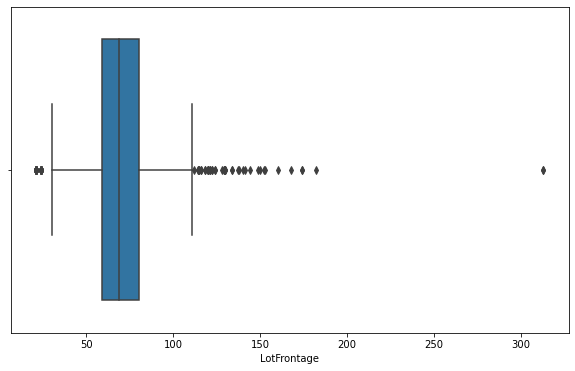

In [37]:
plt.figure(figsize=(10,6))
sns.boxplot(House_numeric["LotFrontage"])

In [38]:
House_numeric['LotFrontage'].isnull().sum()

259

In [39]:
House_numeric['LotFrontage']=House_numeric['LotFrontage'].fillna(House_numeric['LotFrontage'].mean())
House_numeric['LotFrontage'].head()

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
Name: LotFrontage, dtype: float64

In [40]:
House_numeric['LotFrontage'].describe()

count    1460.000000
mean       70.049958
std        22.024023
min        21.000000
25%        60.000000
50%        70.049958
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [41]:
House_numeric['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

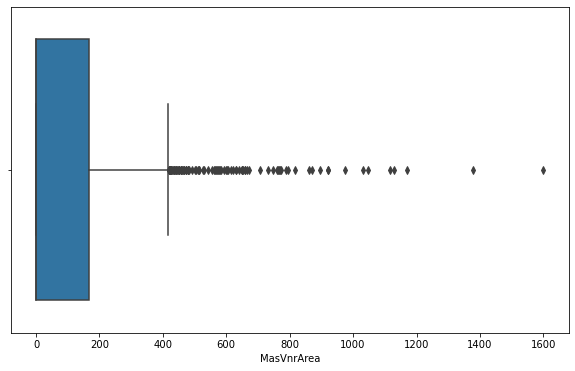

In [42]:
plt.figure(figsize=(10,6))
sns.boxplot(House_numeric["MasVnrArea"])

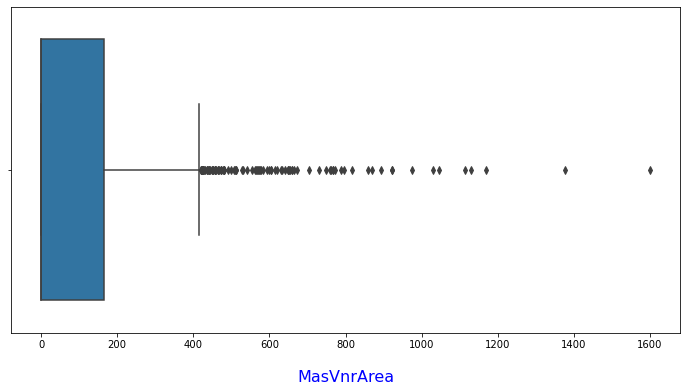

In [43]:
plt.figure(figsize = (12,6))
plt.xlabel('MasVnrArea',fontsize = 16, color = 'blue', labelpad = 20)
    
# Plotting box plot using seaborn library
sns.boxplot(House_numeric['MasVnrArea'])

plt.show()

In [44]:
House_numeric['MasVnrArea'].mean()

103.68526170798899

In [45]:
House_numeric['MasVnrArea']=House_numeric['MasVnrArea'].fillna(House_numeric['MasVnrArea'].mean())
House_numeric['MasVnrArea'].describe()


count    1460.000000
mean      103.685262
std       180.569112
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [46]:
House_numeric['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96]),
 <a list of 97 Text major ticklabel objects>)

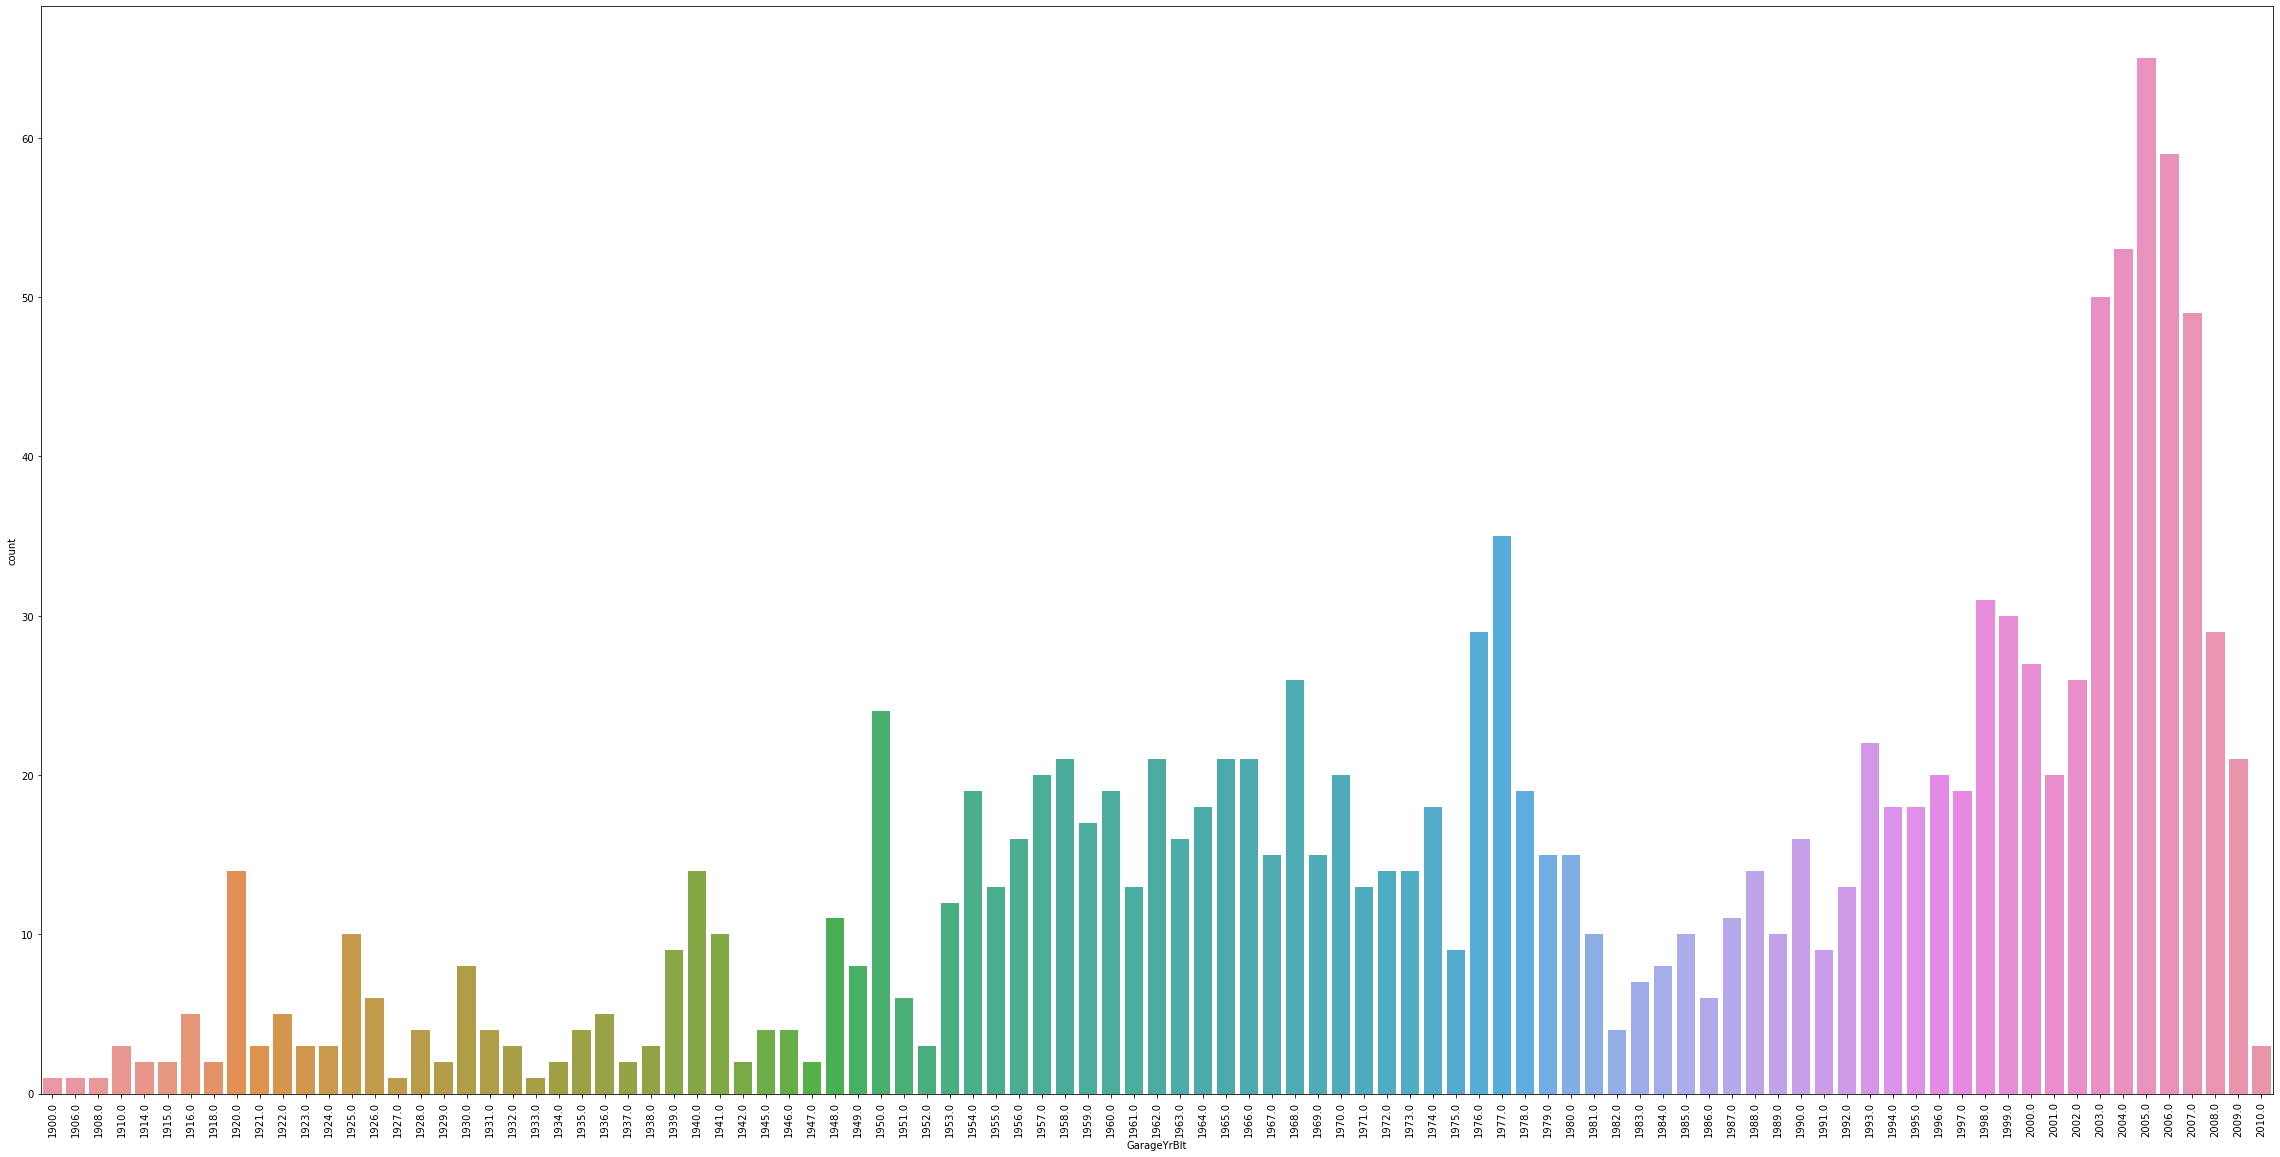

In [47]:
plt.figure(figsize=(40,20))
sns.countplot(House_numeric["GarageYrBlt"])
plt.xticks(rotation=90)

#### Imputing mean for GarageYrBlt Variable 

In [48]:
House_numeric['GarageYrBlt']= House_numeric.GarageYrBlt.fillna(House_numeric.GarageYrBlt.median())

In [49]:
#calculate the age of house i.e. HouseAge from YrSold - YearBuilt 
House_numeric['HouseAge'] = House_numeric.YrSold - House_numeric.YearBuilt

#Drop YrSold, YearBuilt after HouseAge
House_numeric=House_numeric.drop(columns=['YrSold', 'YearBuilt'])

In [50]:
for column in House_numeric.columns:
    print(column+" "+str(round(100 * (House_numeric[column].isnull().sum()/len(House_numeric[column].index)), 2)))

MSSubClass 0.0
LotFrontage 0.0
LotArea 0.0
OverallQual 0.0
OverallCond 0.0
YearRemodAdd 0.0
MasVnrArea 0.0
BsmtFinSF1 0.0
BsmtFinSF2 0.0
BsmtUnfSF 0.0
TotalBsmtSF 0.0
1stFlrSF 0.0
2ndFlrSF 0.0
LowQualFinSF 0.0
GrLivArea 0.0
BsmtFullBath 0.0
BsmtHalfBath 0.0
FullBath 0.0
HalfBath 0.0
BedroomAbvGr 0.0
KitchenAbvGr 0.0
TotRmsAbvGrd 0.0
Fireplaces 0.0
GarageYrBlt 0.0
GarageCars 0.0
GarageArea 0.0
WoodDeckSF 0.0
OpenPorchSF 0.0
EnclosedPorch 0.0
3SsnPorch 0.0
ScreenPorch 0.0
PoolArea 0.0
MiscVal 0.0
MoSold 0.0
SalePrice 0.0
HouseAge 0.0


##### Concatenating Both Numeric and Categorical variables 

In [84]:
house_df = pd.concat([House_numeric,House_categorical],axis =1)

In [85]:
house_df.shape

(1460, 75)

In [86]:
house_df.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearRemodAdd  \
0          60         65.0     8450            7            5          2003   
1          20         80.0     9600            6            8          1976   
2          60         68.0    11250            7            5          2002   
3          70         60.0     9550            7            5          1970   
4          60         84.0    14260            8            5          2000   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0       196.0         706           0        150          856       856   
1         0.0         978           0        284         1262      1262   
2       162.0         486           0        434          920       920   
3         0.0         216           0        540          756       961   
4       350.0         655           0        490         1145      1145   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0       854             0       1710             1             0         2   
1         0             0       1262             0             1         2   
2       866             0       1786             1             0         2   
3       756             0       1717             1             0         1   
4      1053             0       2198             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         1             3             1             8           0   
1         0             3             1             6           1   
2         1             3             1             6           1   
3         0             3             1             7           1   
4         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  \
0              0          0            0         0        0       2   
1              0          0            0         0        0       5   
2              0          0            0         0        0       9   
3            272          0            0         0        0       2   
4              0          0            0         0        0      12   

   SalePrice  HouseAge MSZoning Street LotShape LandContour Utilities  \
0     208500         5       RL   Pave      Reg         Lvl    AllPub   
1     181500        31       RL   Pave      Reg         Lvl    AllPub   
2     223500         7       RL   Pave      IR1         Lvl    AllPub   
3     140000        91       RL   Pave      IR1         Lvl    AllPub   
4     250000         8       RL   Pave      IR1         Lvl    AllPub   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

  RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  ExterQual ExterCond  \
0     Gable  CompShg     VinylSd     VinylSd    BrkFace          4        TA   
1     Gable  CompShg     MetalSd     MetalSd       None          3        TA   
2     Gable  CompShg     VinylSd     VinylSd    BrkFace          4        TA   
3     Gable  CompShg     Wd Sdng     Wd Shng       None          3        TA   
4     Gable  CompShg     VinylSd     VinylS

In [87]:
for c in house_df.columns:
    if house_df[c].dtype == np.object :
        print(c)
        print(house_df[c].value_counts(normalize=True))

MSZoning
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64
Street
Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64
LotShape
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: LotShape, dtype: float64
LandContour
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64
Utilities
AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64
LotConfig
Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: LotConfig, dtype: float64
LandSlope
Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name: LandSlope, dtype: float64
Neighborhood
NAmes      0.154110
CollgCr    0.102740
OldTown    0.077397
Edwards    0.068493
Somerst    0.058904
Gilbert    0.054110
NridgHt    0.052740
Sawyer     0.050685
NWAmes     0.050000
SawyerW    0.040411
BrkSide    0.039726
Crawfor    0.034932
Mitchel    0.

In [88]:
#Drop columns which have more bias data
house_df=house_df.drop(columns=['Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'BsmtCond'
                                    ,'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond'
                                    , 'PavedDrive', 'Condition1', 'BldgType', 'ExterCond', 'BsmtFinType2', 'SaleType'
                                    , 'SaleCondition'])

In [89]:
cat_col = house_df.select_dtypes(include =["object"]).columns.values

num_col = house_df.select_dtypes(include =["int64","float64"]).columns.values

ccols = house_df[cat_col].isnull().sum()
ncols = house_df[num_col].isnull().sum()

### DATA PREPARATION

# Variables Analysis

- Categorical  vs. Target Variable
- Nummerical vs. Target Variable

#### Categorical vs. Target Variable

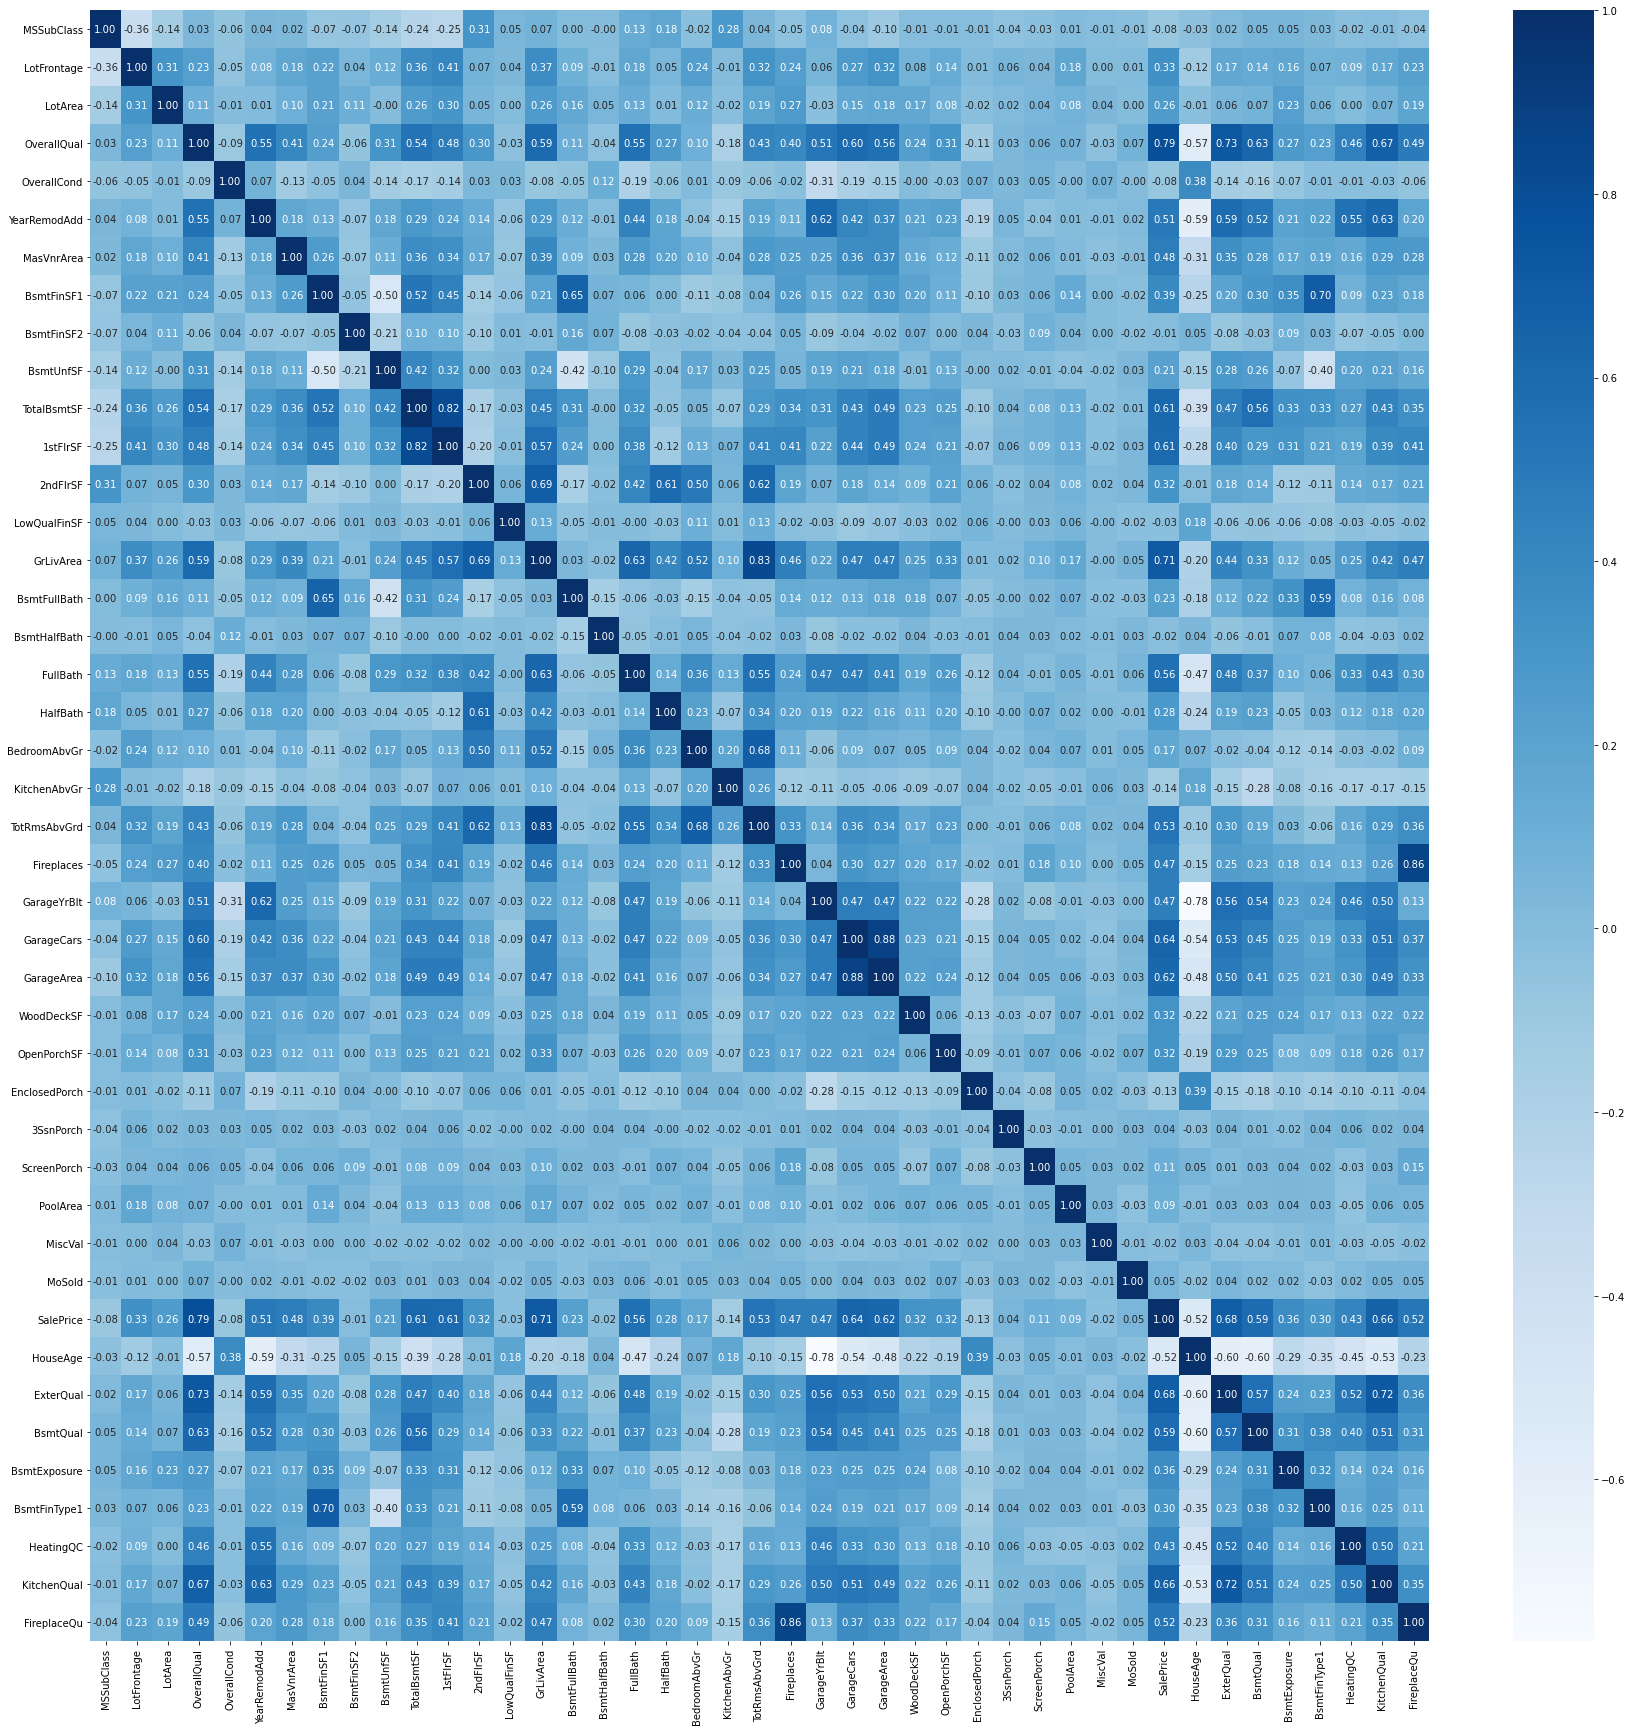

In [90]:
plt.figure(figsize = (30,30))

# Heatmap to check correlation with correlation coefficient
sns.heatmap(house_df.corr(), annot = True, cmap = 'Blues', fmt = '0.2f')

# Showing the plot using matplotlib.pyplot show() function
plt.show()

In [91]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 55 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearRemodAdd   1460 non-null   int64  
 6   MasVnrArea     1460 non-null   float64
 7   BsmtFinSF1     1460 non-null   int64  
 8   BsmtFinSF2     1460 non-null   int64  
 9   BsmtUnfSF      1460 non-null   int64  
 10  TotalBsmtSF    1460 non-null   int64  
 11  1stFlrSF       1460 non-null   int64  
 12  2ndFlrSF       1460 non-null   int64  
 13  LowQualFinSF   1460 non-null   int64  
 14  GrLivArea      1460 non-null   int64  
 15  BsmtFullBath   1460 non-null   int64  
 16  BsmtHalfBath   1460 non-null   int64  
 17  FullBath       1460 non-null   int64  
 18  HalfBath

- Remaining Category cols
- ['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'GarageType', 'GarageFinish']

In [92]:
objcols= ['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle',
          'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'GarageType', 'GarageFinish']

In [93]:
def boxplotmulti(df,column):

    plt.figure(figsize = (30,30))
    i=1
    for col in enumerate(list(column)):
        plt.subplot(4,4,i)
        i = i+1
        # Plotting box plot using seaborn
        sns.boxplot(df[col[1]], df['SalePrice'], palette = 'deep')
        plt.xlabel(col[1].title(),fontsize = 16, color = 'blue', labelpad = 5)

        plt.xticks(fontsize = 10, rotation = 90)

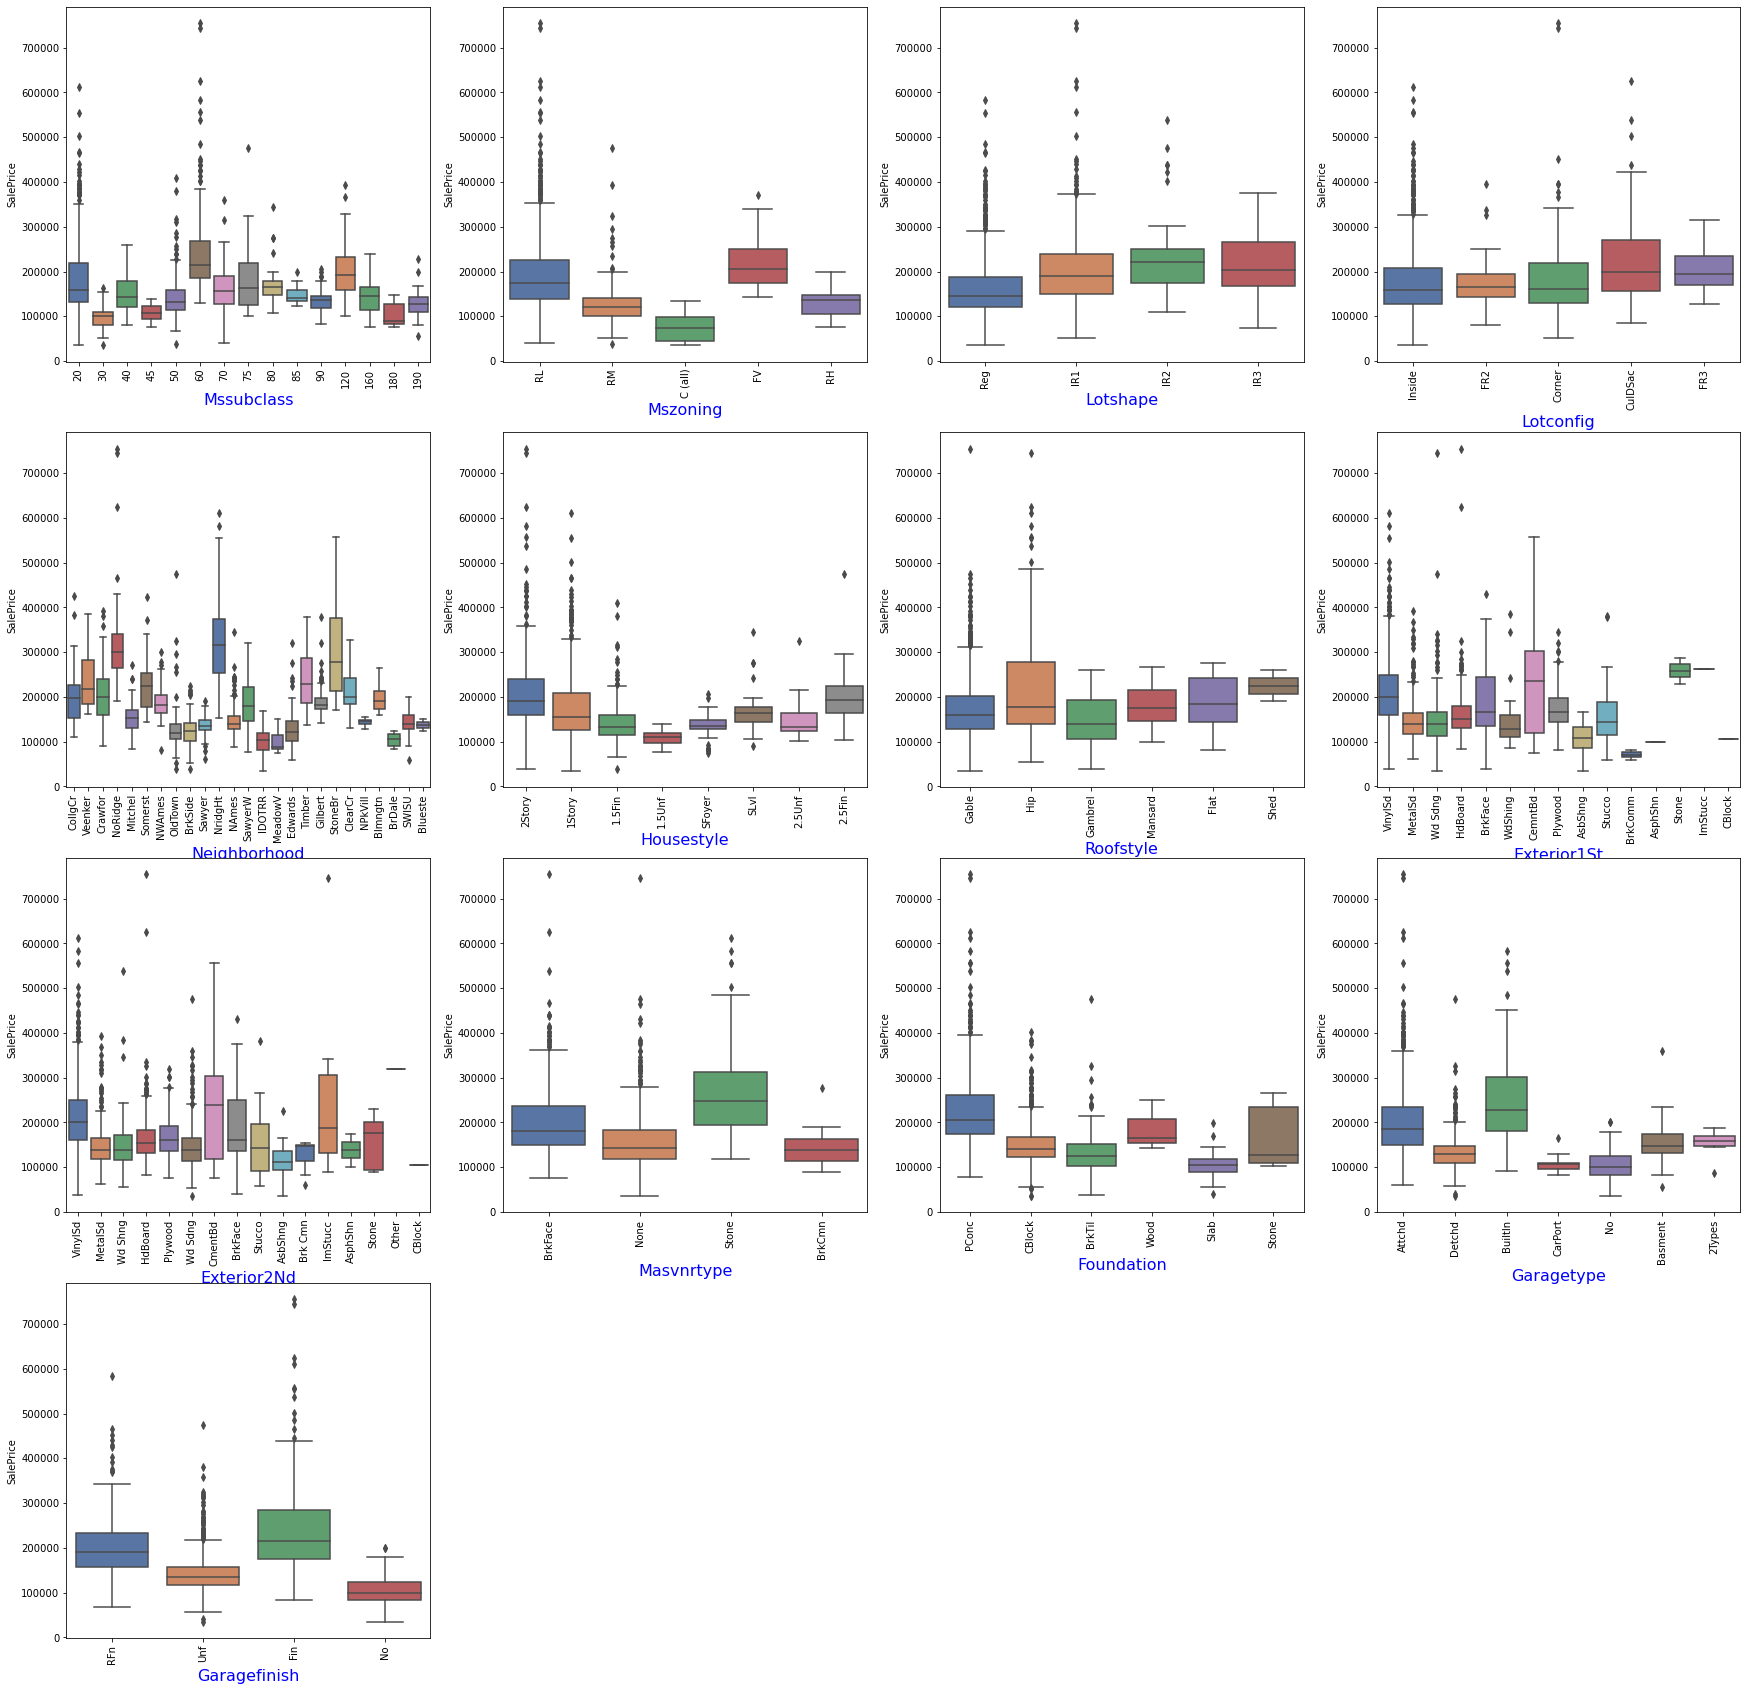

In [94]:
boxplotmulti(house_df, objcols)
plt.show()

#### Nummerical vs. Target Variable

In [95]:
def scatterplotmulti(df,column):

    plt.figure(figsize = (20,20))
    i=1
    for col in enumerate(list(column)):
        plt.subplot(2,3,i)
        i = i+1
        # Plotting box plot using seaborn
        sns.scatterplot(df[col[1]],df['SalePrice'])

        plt.xticks(fontsize = 10, rotation = 90)

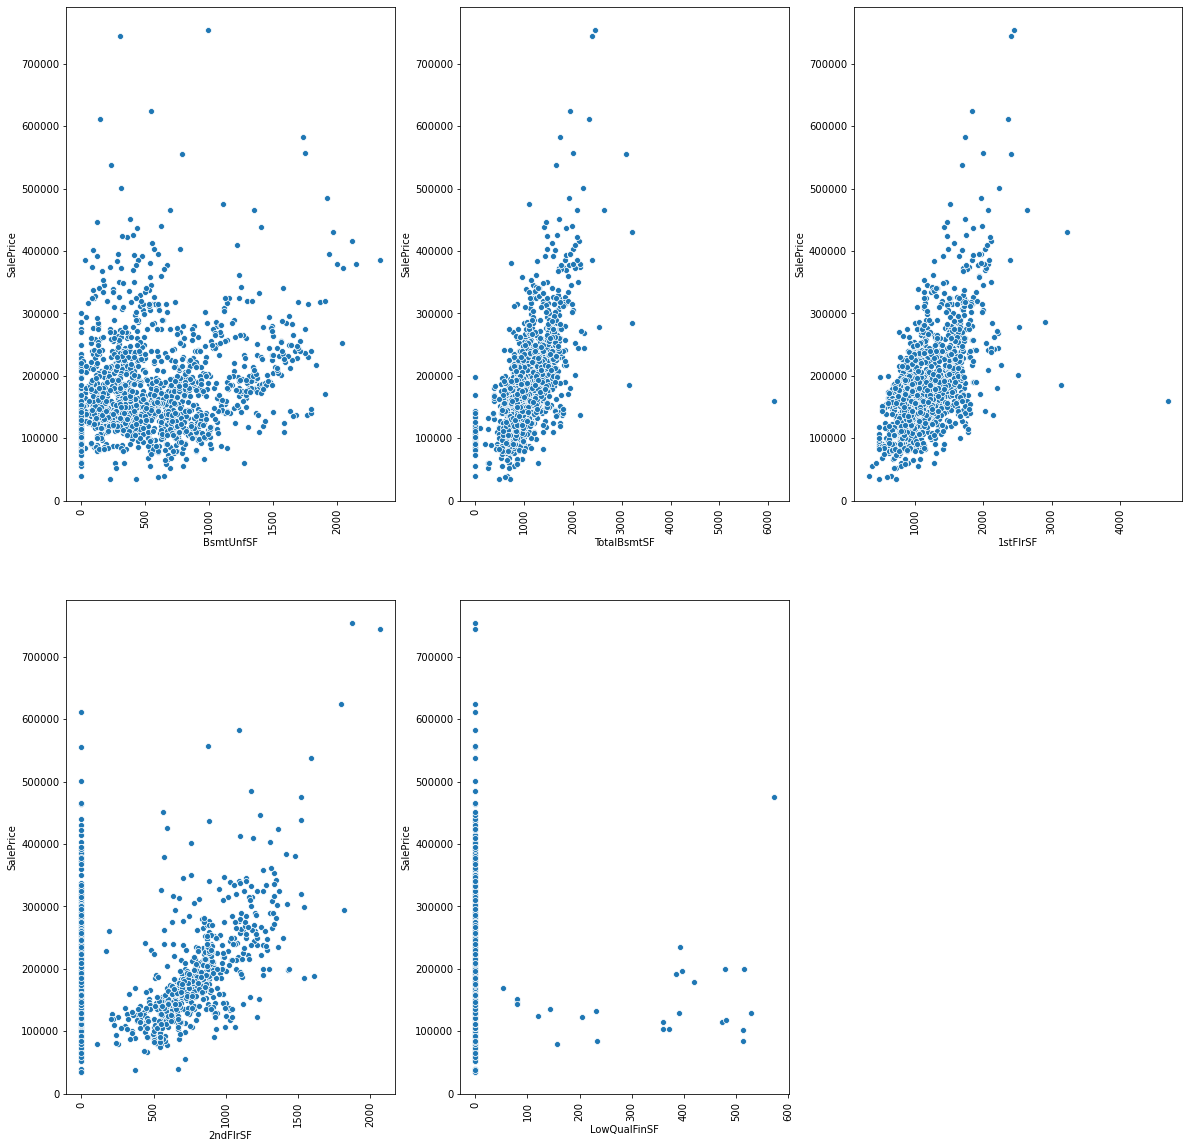

In [96]:
columns = ['BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF','LowQualFinSF']

scatterplotmulti(house_df, columns)
plt.show()

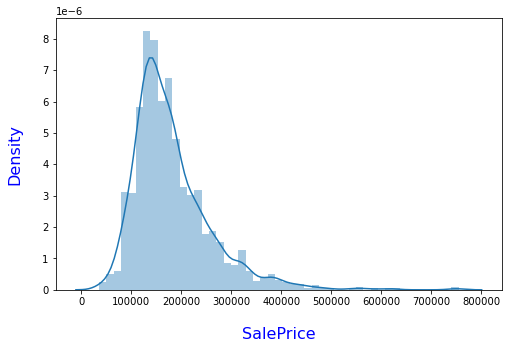

In [97]:
# Setting figuresize
plt.figure(figsize=(8,5))

# Plotting distribution plot using seaborn library
sns.distplot(house_df['SalePrice'])

# Setting axis label and display parameters
plt.xlabel('SalePrice',fontsize = 16, color = 'blue', labelpad = 20)
plt.ylabel('Density',fontsize = 16, color = 'blue', labelpad = 20)

# Showing the plot using matplotlib.pyplot show() function 
plt.show()

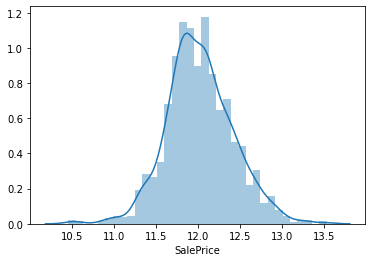

In [98]:
sns.distplot(np.log(house_df['SalePrice'])) #therefore we will tranform the data into log as it is now normally distributed

In [99]:
house_df['SalePrice'] = np.log(house_df['SalePrice'])

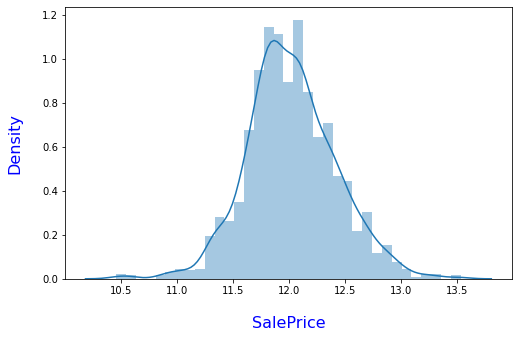

In [100]:
# Setting figuresize
plt.figure(figsize=(8,5))

# Plotting distribution plot using seaborn library
sns.distplot(house_df['SalePrice'])

# Setting axis label and display parameters
plt.xlabel('SalePrice',fontsize = 16, color = 'blue', labelpad = 20)
plt.ylabel('Density',fontsize = 16, color = 'blue', labelpad = 20)

# Showing the plot using matplotlib.pyplot show() function 
plt.show()

In [101]:
dummy_df= pd.get_dummies(house_df[objcols], drop_first = True)

In [102]:
dummy_df.shape

(1460, 94)

In [103]:
house_df = pd.concat([house_df,dummy_df],axis=1)

In [104]:
house_df=house_df.drop(columns=objcols)

In [105]:
house_df.shape

(1460, 135)

In [106]:
house_df.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_No', 'GarageFinish_No', 'GarageFinish_RFn',
       'GarageFinish_Unf'],
      dtype='object', length=135)

In [107]:
house_df.head()

LotFrontage  LotArea  OverallQual  OverallCond  YearRemodAdd  MasVnrArea  \
0         65.0     8450            7            5          2003       196.0   
1         80.0     9600            6            8          1976         0.0   
2         68.0    11250            7            5          2002       162.0   
3         60.0     9550            7            5          1970         0.0   
4         84.0    14260            8            5          2000       350.0   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
0         706           0        150          856       856       854   
1         978           0        284         1262      1262         0   
2         486           0        434          920       920       866   
3         216           0        540          756       961       756   
4         655           0        490         1145      1145      1053   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   
1             0       1262             0             1         2         0   
2             0       1786             1             0         2         1   
3             0       1717             1             0         1         0   
4             0       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  \
0             3             1             8           0       2003.0   
1             3             1             6           1       1976.0   
2             3             1             6           1       2001.0   
3             3             1             7           1       1998.0   
4             4             1             9           1       2000.0   

   GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0           2         548           0           61              0          0   
1           2         460         298            0              0          0   
2           2         608           0           42              0          0   
3           3         642           0           35            272          0   
4           3         836         192           84              0          0   

   ScreenPorch  PoolArea  MiscVal  MoSold  SalePrice  HouseAge  ExterQual  \
0            0         0        0       2  12.247694         5          4   
1            0         0        0       5  12.109011        31          3   
2            0         0        0       9  12.317167         7          4   
3            0         0        0       2  11.849398        91          3   
4            0         0        0      12  12.429216         8          4   

   BsmtQual  BsmtExposure  BsmtFinType1  HeatingQC  KitchenQual  FireplaceQu  \
0         4             1             6          5            4            0   
1         4             4             5          5            3            3   
2         4             2             6          5            4            3   
3         3             1             5          4            4            4   
4         4             3             6          5            4            3   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  \
0            0            0            1            0             0   
1            0            0            1            0             0   
2            0            0            1            0             0   
3            0            0            1            0             0   
4            0            0            1            0             0   

   LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  \
0             0             1                  0              0   
1             0             1                  0              1   
2             0             0                  0              0   
3             0             0                  0              0   


In [108]:
# setting the seed so that train and test data set always have the same rows, respectively
np.random.seed(0)

# lets split train:test as 70% to 30%
traindf, testdf = train_test_split(house_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [109]:
y_test = testdf.pop('SalePrice')
X_test = testdf

In [110]:
y_train = traindf.pop('SalePrice')
X_train = traindf

In [111]:
X_train.shape

(1021, 134)

In [112]:
X_test.shape

(438, 134)

In [113]:
traindf.head()

LotFrontage  LotArea  OverallQual  OverallCond  YearRemodAdd  \
210          67.0     5604            5            6          1950   
318          90.0     9900            7            5          1993   
239          52.0     8741            6            4          1950   
986          59.0     5310            6            8          2003   
1416         60.0    11340            4            6          1950   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
210          0.0         468           0        396          864       864   
318        256.0         987           0        360         1347      1372   
239          0.0          94           0        641          735       798   
986          0.0           0           0        485          485      1001   
1416         0.0           0           0        777          777      1246   

      2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
210          0             0        864             1             0         1   
318       1274             0       2646             1             0         2   
239        689             0       1487             0             0         1   
986        634             0       1635             0             0         1   
1416      1044             0       2290             0             0         2   

      HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
210          0             2             1             5           0   
318          1             4             1             9           1   
239          1             3             1             7           1   
986          0             2             1             5           0   
1416         0             4             2            11           0   

      GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
210        1980.0           0           0           0            0   
318        1993.0           3         656         340           60   
239        1949.0           1         220           0          140   
986        1950.0           1         255         394            0   
1416       1971.0           2         560           0            0   

      EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  \
210              96          0            0         0        0       4   
318             144          0            0         0        0       4   
239               0          0            0         0        0       4   
986               0          0            0         0        0       6   
1416            114          0            0         0        0       4   

      HouseAge  ExterQual  BsmtQual  BsmtExposure  BsmtFinType1  HeatingQC  \
210         83          3         3             1             3          3   
318         16          4         4             4             6          5   
239         65          3         3             1             2          3   
986         96          3         3             1             1          4   
1416       125          3         3             1             1          4   

      KitchenQual  FireplaceQu  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
210             3            0            0            0            1   
318             4            3            0            0            1   
239             3            4            0            0            1   
986             4            0            0            0            0   
1416            3            0            0            0            0   

      MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
210             0             0             0             1   
318             0             0             0             1   
239             0             0             0             1   
986             1             0             0             1   
1416            1             0             0             1   

      LotConfig_CulDSac  LotConfig_FR2  Lot

In [114]:
X_train.head()

LotFrontage  LotArea  OverallQual  OverallCond  YearRemodAdd  \
210          67.0     5604            5            6          1950   
318          90.0     9900            7            5          1993   
239          52.0     8741            6            4          1950   
986          59.0     5310            6            8          2003   
1416         60.0    11340            4            6          1950   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
210          0.0         468           0        396          864       864   
318        256.0         987           0        360         1347      1372   
239          0.0          94           0        641          735       798   
986          0.0           0           0        485          485      1001   
1416         0.0           0           0        777          777      1246   

      2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
210          0             0        864             1             0         1   
318       1274             0       2646             1             0         2   
239        689             0       1487             0             0         1   
986        634             0       1635             0             0         1   
1416      1044             0       2290             0             0         2   

      HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
210          0             2             1             5           0   
318          1             4             1             9           1   
239          1             3             1             7           1   
986          0             2             1             5           0   
1416         0             4             2            11           0   

      GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
210        1980.0           0           0           0            0   
318        1993.0           3         656         340           60   
239        1949.0           1         220           0          140   
986        1950.0           1         255         394            0   
1416       1971.0           2         560           0            0   

      EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  \
210              96          0            0         0        0       4   
318             144          0            0         0        0       4   
239               0          0            0         0        0       4   
986               0          0            0         0        0       6   
1416            114          0            0         0        0       4   

      HouseAge  ExterQual  BsmtQual  BsmtExposure  BsmtFinType1  HeatingQC  \
210         83          3         3             1             3          3   
318         16          4         4             4             6          5   
239         65          3         3             1             2          3   
986         96          3         3             1             1          4   
1416       125          3         3             1             1          4   

      KitchenQual  FireplaceQu  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
210             3            0            0            0            1   
318             4            3            0            0            1   
239             3            4            0            0            1   
986             4            0            0            0            0   
1416            3            0            0            0            0   

      MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
210             0             0             0             1   
318             0             0             0             1   
239             0             0             0             1   
986             1             0             0             1   
1416            1             0             0             1   

      LotConfig_CulDSac  LotConfig_FR2  Lot

In [115]:
for column in X_train.columns:
    print(column+" "+str(round(100 * (X_train[column].isnull().sum()/len(X_train[column].index)), 2)))

LotFrontage 0.0
LotArea 0.0
OverallQual 0.0
OverallCond 0.0
YearRemodAdd 0.0
MasVnrArea 0.0
BsmtFinSF1 0.0
BsmtFinSF2 0.0
BsmtUnfSF 0.0
TotalBsmtSF 0.0
1stFlrSF 0.0
2ndFlrSF 0.0
LowQualFinSF 0.0
GrLivArea 0.0
BsmtFullBath 0.0
BsmtHalfBath 0.0
FullBath 0.0
HalfBath 0.0
BedroomAbvGr 0.0
KitchenAbvGr 0.0
TotRmsAbvGrd 0.0
Fireplaces 0.0
GarageYrBlt 0.0
GarageCars 0.0
GarageArea 0.0
WoodDeckSF 0.0
OpenPorchSF 0.0
EnclosedPorch 0.0
3SsnPorch 0.0
ScreenPorch 0.0
PoolArea 0.0
MiscVal 0.0
MoSold 0.0
HouseAge 0.0
ExterQual 0.0
BsmtQual 0.0
BsmtExposure 0.0
BsmtFinType1 0.0
HeatingQC 0.0
KitchenQual 0.0
FireplaceQu 0.0
MSZoning_FV 0.0
MSZoning_RH 0.0
MSZoning_RL 0.0
MSZoning_RM 0.0
LotShape_IR2 0.0
LotShape_IR3 0.0
LotShape_Reg 0.0
LotConfig_CulDSac 0.0
LotConfig_FR2 0.0
LotConfig_FR3 0.0
LotConfig_Inside 0.0
Neighborhood_Blueste 0.0
Neighborhood_BrDale 0.0
Neighborhood_BrkSide 0.0
Neighborhood_ClearCr 0.0
Neighborhood_CollgCr 0.0
Neighborhood_Crawfor 0.0
Neighborhood_Edwards 0.0
Neighborhood_Gil

In [118]:
sc = StandardScaler()
num_vars = ['LotFrontage','LotArea','YearRemodAdd','MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 
            'BsmtUnfSF', 'TotalBsmtSF', 'TotalBsmtSF'
           ,  '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath'
            , 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces'
           , 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch'
           , '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold','HouseAge']


In [119]:
# Fitting and transforming numerical columns and storing back into original train dataset
X_train[num_vars] = sc.fit_transform(X_train[num_vars])

X_train.head()

LotFrontage   LotArea  OverallQual  OverallCond  YearRemodAdd  \
210     -0.123555 -0.473765            5            6     -1.694350   
318      0.918688 -0.056845            7            5      0.390956   
239     -0.803279 -0.169324            6            4     -1.694350   
986     -0.486074 -0.502297            6            8      0.875911   
1416    -0.440759  0.082905            4            6     -1.694350   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
210    -0.560537    0.043512   -0.293313  -0.374367    -0.430911 -0.765065   
318     0.807462    1.160345   -0.293313  -0.454644     0.621579  0.511914   
239    -0.560537   -0.761296   -0.293313   0.171964    -0.712011 -0.930972   
986    -0.560537   -0.963574   -0.293313  -0.175904    -1.256778 -0.420683   
1416   -0.560537   -0.963574   -0.293313   0.475233    -0.620490  0.195183   

      2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
210  -0.787597     -0.124502  -1.228053      1.066863     -0.247791 -1.026085   
318   2.140556     -0.124502   2.123103      1.066863     -0.247791  0.786428   
239   0.795996     -0.124502  -0.056465     -0.837450     -0.247791 -1.026085   
986   0.669584     -0.124502   0.221858     -0.837450     -0.247791 -1.026085   
1416  1.611926     -0.124502   1.453624     -0.837450     -0.247791  0.786428   

      HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
210  -0.751723     -1.042717     -0.234155     -0.935650   -0.925422   
318   1.246998      1.396261     -0.234155      1.556976    0.623522   
239   1.246998      0.176772     -0.234155      0.310663    0.623522   
986  -0.751723     -1.042717     -0.234155     -0.935650   -0.925422   
1416 -0.751723      1.396261      4.112612      2.803289   -0.925422   

      GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
210      0.048537   -2.366798   -2.217786   -0.743160    -0.709347   
318      0.591737    1.645101    0.867506    1.989482     0.197980   
239     -1.246786   -1.029498   -1.183084   -0.743160     1.407748   
986     -1.205001   -1.029498   -1.018473    2.423490    -0.709347   
1416    -0.327524    0.307802    0.416000   -0.743160    -0.709347   

      EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   MiscVal    MoSold  \
210        1.150231  -0.121922    -0.275126 -0.062302 -0.084263 -0.832187   
318        1.910043  -0.121922    -0.275126 -0.062302 -0.084263 -0.832187   
239       -0.369395  -0.121922    -0.275126 -0.062302 -0.084263 -0.832187   
986       -0.369395  -0.121922    -0.275126 -0.062302 -0.084263 -0.104424   
1416       1.435160  -0.121922    -0.275126 -0.062302 -0.084263 -0.832187   

      HouseAge  ExterQual  BsmtQual  BsmtExposure  BsmtFinType1  HeatingQC  \
210   1.529604          3         3             1             3          3   
318  -0.677573          4         4             4             6          5   
239   0.936631          3         3             1             2          3   
986   1.957862          3         3             1             1          4   
1416  2.913207          3         3             1             1          4   

      KitchenQual  FireplaceQu  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
210             3            0            0            0            1   
318             4            3            0            0            1   
239             3            4            0            0            1   
986             4            0            0            0            0   
1416            3            0            0            0            0   

      MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
210             0             0             0             1   
318             0             0             0             1   
239             0             0             0             1   
986             1             0             0             1   
1416            1             0             0             1   

      LotConfig_Cul

In [120]:
X_train.head()

LotFrontage   LotArea  OverallQual  OverallCond  YearRemodAdd  \
210     -0.123555 -0.473765            5            6     -1.694350   
318      0.918688 -0.056845            7            5      0.390956   
239     -0.803279 -0.169324            6            4     -1.694350   
986     -0.486074 -0.502297            6            8      0.875911   
1416    -0.440759  0.082905            4            6     -1.694350   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
210    -0.560537    0.043512   -0.293313  -0.374367    -0.430911 -0.765065   
318     0.807462    1.160345   -0.293313  -0.454644     0.621579  0.511914   
239    -0.560537   -0.761296   -0.293313   0.171964    -0.712011 -0.930972   
986    -0.560537   -0.963574   -0.293313  -0.175904    -1.256778 -0.420683   
1416   -0.560537   -0.963574   -0.293313   0.475233    -0.620490  0.195183   

      2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
210  -0.787597     -0.124502  -1.228053      1.066863     -0.247791 -1.026085   
318   2.140556     -0.124502   2.123103      1.066863     -0.247791  0.786428   
239   0.795996     -0.124502  -0.056465     -0.837450     -0.247791 -1.026085   
986   0.669584     -0.124502   0.221858     -0.837450     -0.247791 -1.026085   
1416  1.611926     -0.124502   1.453624     -0.837450     -0.247791  0.786428   

      HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
210  -0.751723     -1.042717     -0.234155     -0.935650   -0.925422   
318   1.246998      1.396261     -0.234155      1.556976    0.623522   
239   1.246998      0.176772     -0.234155      0.310663    0.623522   
986  -0.751723     -1.042717     -0.234155     -0.935650   -0.925422   
1416 -0.751723      1.396261      4.112612      2.803289   -0.925422   

      GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
210      0.048537   -2.366798   -2.217786   -0.743160    -0.709347   
318      0.591737    1.645101    0.867506    1.989482     0.197980   
239     -1.246786   -1.029498   -1.183084   -0.743160     1.407748   
986     -1.205001   -1.029498   -1.018473    2.423490    -0.709347   
1416    -0.327524    0.307802    0.416000   -0.743160    -0.709347   

      EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   MiscVal    MoSold  \
210        1.150231  -0.121922    -0.275126 -0.062302 -0.084263 -0.832187   
318        1.910043  -0.121922    -0.275126 -0.062302 -0.084263 -0.832187   
239       -0.369395  -0.121922    -0.275126 -0.062302 -0.084263 -0.832187   
986       -0.369395  -0.121922    -0.275126 -0.062302 -0.084263 -0.104424   
1416       1.435160  -0.121922    -0.275126 -0.062302 -0.084263 -0.832187   

      HouseAge  ExterQual  BsmtQual  BsmtExposure  BsmtFinType1  HeatingQC  \
210   1.529604          3         3             1             3          3   
318  -0.677573          4         4             4             6          5   
239   0.936631          3         3             1             2          3   
986   1.957862          3         3             1             1          4   
1416  2.913207          3         3             1             1          4   

      KitchenQual  FireplaceQu  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
210             3            0            0            0            1   
318             4            3            0            0            1   
239             3            4            0            0            1   
986             4            0            0            0            0   
1416            3            0            0            0            0   

      MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
210             0             0             0             1   
318             0             0             0             1   
239             0             0             0             1   
986             1             0             0             1   
1416            1             0             0             1   

      LotConfig_Cul

Performing Linear Regresion

In [121]:
# Creating linear regression object for performing RFE
lm = LinearRegression()
lm.fit(X_train, y_train)

# Perform recursive feature elimination (RFE) with 50 features
rfe = RFE(lm, 50)
rfe = rfe.fit(X_train, y_train)

In [122]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('LotFrontage', False, 49),
 ('LotArea', False, 16),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearRemodAdd', True, 1),
 ('MasVnrArea', False, 43),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 4),
 ('BsmtUnfSF', False, 2),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 3),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 75),
 ('FullBath', False, 24),
 ('HalfBath', False, 38),
 ('BedroomAbvGr', False, 27),
 ('KitchenAbvGr', False, 21),
 ('TotRmsAbvGrd', False, 77),
 ('Fireplaces', False, 85),
 ('GarageYrBlt', False, 72),
 ('GarageCars', True, 1),
 ('GarageArea', False, 35),
 ('WoodDeckSF', False, 34),
 ('OpenPorchSF', False, 83),
 ('EnclosedPorch', False, 44),
 ('3SsnPorch', False, 59),
 ('ScreenPorch', False, 45),
 ('PoolArea', False, 15),
 ('MiscVal', False, 80),
 ('MoSold', False, 81),
 ('HouseAge', False, 64),
 ('ExterQual', False, 40),
 ('BsmtQual', True, 1),
 ('BsmtExposure', Fal

In [123]:
#selected columns from rfe
col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtFinSF1',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'GarageCars', 'BsmtQual', 'KitchenQual', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR3', 'LotConfig_FR2',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_MeadowV', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_SawyerW', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker',
       'HouseStyle_2Story', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd',
       'Exterior1st_WdShing', 'Exterior2nd_AsphShn', 'Exterior2nd_CBlock',
       'Exterior2nd_CmentBd', 'Exterior2nd_Wd Shng', 'Foundation_PConc',
       'Foundation_S

In [124]:
#create X_train with RFE selected columns
X_train_rfe = X_train[col]

In [125]:
#adding a constant variable
X_train_lm = sm.add_constant(X_train_rfe)

#create a RFE model
lm = sm.OLS(y_train,X_train_lm).fit()  #Running the linear Model

#Get the Summary of Linear Model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     162.8
Date:                Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                        09:55:54   Log-Likelihood:                 609.65
No. Observations:                1021   AIC:                            -1123.
Df Residuals:                     973   BIC:                            -886.7
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   10.7524      0.072    149.436      0.000      10.611      10.894
OverallQual              0.0630      0.006     10.642      0.000       0.051       0.075
OverallCond              0.0357      0.005      7.262      0.000       0.026       0.045
YearRemodAdd             0.0313      0.007      4.705      0.000       0.018       0.044
BsmtFinSF1               0.0118      0.006      1.816      0.070      -0.001       0.025
TotalBsmtSF              0.0050      0.011      0.476      0.634      -0.016       0.026
1stFlrSF                 0.0711      0.038      1.846      0.065      -0.004       0.147
2ndFlrSF                 0.0757      0.042      1.793      0.073      -0.007       0.159
GrLivArea                0.0353      0.050      0.712      0.476      -0.062       0.132
BsmtFullBath             0.0296      0.006      5.154      0.000       0.018       0.041
GarageCars               0.0580      0.007      7.919      0.000       0.044       0.072
BsmtQual                 0.0412      0.008      4.890      0.000       0.025       0.058
KitchenQual              0.0235      0.010      2.299      0.022       0.003       0.043
MSZoning_FV              0.4096      0.068      6.032      0.000       0.276       0.543
MSZoning_RH              0.4348      0.066      6.634      0.000       0.306       0.563
MSZoning_RL              0.4691      0.054      8.708      0.000       0.363       0.575
MSZoning_RM              0.3464      0.055      6.311      0.000       0.239       0.454
LotShape_IR3            -0.1304      0.048     -2.702      0.007      -0.225      -0.036
LotConfig_FR2           -0.0420      0.026     -1.634      0.103      -0.093       0.008
Neighborhood_BrDale     -0.0207      0.044     -0.465      0.642      -0.108       0.066
Neighborhood_BrkSide     0.0430      0.024      1.782      0.075      -0.004       0.090
Neighborhood_ClearCr     0.1716      0.032      5.377      0.000       0.109       0.234
Neighborhood_CollgCr     0.0686      0.018      3.748      0.000       0.033       0.105
Neighborhood_Crawfor     0.1565      0.026      5.958      0.000       0.105       0.208
Neighborhood_Edwards    -0.0708      0.018     -3.829      0.000      -0.107      -0.035
Neighborhood_Gilbert     0.0780      0.025      3.181      0.002       0.030       0.126
Neighborhood_MeadowV    -0.1437      0.056     -2.547      0.011      -0.254      -0.033
Neighborhood_NoRidge     0.1683      0.029      5.796      0.000       0.111       0.225
Neighborhood_NridgHt     0.1823      0.025      7.313      0.000       0.133       0.231
Neighborhood_SawyerW     0.0414      0.023      1.773      0.077      -0.004       0.087
Neighborhood_Somerst     0.1755      0.039      4.477      0.000       0.099       0.252
Neighborhood_StoneBr     0.1260      0.042      3.031    

In [126]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

Features     VIF
49       GarageFinish_No     inf
34   Exterior1st_AsphShn     inf
48         GarageType_No     inf
41    Exterior2nd_CBlock     inf
40   Exterior2nd_AsphShn     inf
37    Exterior1st_CBlock     inf
7              GrLivArea  133.81
6               2ndFlrSF   96.74
5               1stFlrSF   81.07
0            OverallQual   72.39
14           MSZoning_RL   69.68
11           KitchenQual   64.08
10              BsmtQual   45.28
1            OverallCond   39.57
42   Exterior2nd_CmentBd   19.68
38   Exterior1st_CemntBd   19.55
15           MSZoning_RM   14.91
12           MSZoning_FV    8.06
4            TotalBsmtSF    5.77
33     HouseStyle_2Story    5.31
44      Foundation_PConc    5.00
29  Neighborhood_Somerst    4.95
9             GarageCars    2.94
3             BsmtFinSF1    2.31
47     GarageType_Detchd    2.31
2           YearRemodAdd    2.11
13           MSZoning_RH    2.08
27  Neighborhood_NridgHt    1.94
21  Neighborhood_CollgCr    1.82
8           BsmtFullBath    1.81
24  Neighborhood_Gilbert    1.71
43   Exterior2nd_Wd Shng    1.57
25  Neighborhood_MeadowV    1.54
26  Neighborhood_NoRidge    1.54
39   Exterior1st_WdShing    1.52
23  Neighborhood_Edwards    1.41
28  Neighborhood_SawyerW    1.32
18   Neighborhood_BrDale    1.27
31   Neighborhood_Timber    1.23
19  Neighborhood_BrkSide    1.22
30  Neighborhood_StoneBr    1.20
22  Neighborhood_Crawfor    1.17
36   Exterior1st_BrkFace    1.17
46    GarageType_Basment    1.12
16          LotShape_IR3    1.12
32  Neighborhood_Veenker    1.12
17         LotConfig_FR2    1.10
20  Neighborhood_ClearCr    1.09
35   Exterior1st_BrkComm    1.05
45      Foundation_Stone    1.05

In [127]:
X_test[num_vars] = sc.transform(X_test[num_vars])

X_test.head()

LotFrontage   LotArea  OverallQual  OverallCond  YearRemodAdd  \
1436    -0.440759 -0.144189            4            6     -0.675945   
57       0.873373  0.112505            7            5      0.924407   
780     -0.304815 -0.253368            7            5      0.536443   
382      0.420224 -0.120412            7            5      1.021398   
1170     0.284279 -0.058786            6            6     -0.384972   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
1436   -0.560537    0.361992   -0.293313  -0.704396    -0.430911 -0.765065   
57     -0.560537   -0.963574   -0.293313   0.660317    -0.439628 -0.775120   
780    -0.357475   -0.963574   -0.293313   1.500998     0.381881  0.212779   
382    -0.560537   -0.963574   -0.293313   0.836481    -0.267481 -0.576535   
1170   -0.560537    0.159714   -0.293313   0.022559     0.074633 -0.126576   

      2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
1436 -0.787597     -0.124502  -1.228053     -0.837450     -0.247791 -1.026085   
57    1.189021     -0.124502   0.381706     -0.837450     -0.247791  0.786428   
780  -0.787597     -0.124502  -0.496515     -0.837450     -0.247791  0.786428   
382   1.184425     -0.124502   0.526509     -0.837450     -0.247791  0.786428   
1170 -0.787597     -0.124502  -0.750391      1.066863     -0.247791 -1.026085   

      HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
1436 -0.751723      0.176772     -0.234155     -0.935650   -0.925422   
57    1.246998      0.176772     -0.234155      0.310663   -0.925422   
780  -0.751723      0.176772     -0.234155     -0.312494    0.623522   
382   1.246998      0.176772     -0.234155      0.933819   -0.925422   
1170 -0.751723      0.176772     -0.234155     -0.312494    0.623522   

      GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
1436    -0.202170    0.307802    0.265498   -0.743160    -0.709347   
57       1.051368    0.307802    0.439515   -0.743160     0.349201   
780      0.675307    0.307802   -0.327104    1.025020    -0.391783   
382      1.134937    0.307802    0.787551    0.414194     0.092125   
1170    -0.076817   -1.029498   -0.534044    0.888388    -0.709347   

      EnclosedPorch  3SsnPorch  ScreenPorch   PoolArea   MiscVal    MoSold  \
1436      -0.369395  -0.121922    -0.275126  -0.062302 -0.084263 -0.468306   
57        -0.369395  -0.121922    -0.275126  -0.062302 -0.084263  0.623338   
780       -0.369395  -0.121922    -0.275126  -0.062302 -0.084263 -0.104424   
382       -0.369395  -0.121922    -0.275126  -0.062302 -0.084263 -0.832187   
1170      -0.369395  -0.121922    -0.275126  16.629857 -0.084263  0.259457   

      HouseAge  ExterQual  BsmtQual  BsmtExposure  BsmtFinType1  HeatingQC  \
1436 -0.018714          3         3             1             5          3   
57   -1.138774          4         4             1             1          5   
780  -0.809344          3         4             1             1          4   
382  -1.171717          4         4             3             1          5   
1170 -0.183429          3         3             3             5          3   

      KitchenQual  FireplaceQu  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
1436            3            0            0            0            1   
57              4            0            0            0            1   
780             3            3            0            0            1   
382             4            0            0            0            1   
1170            3            1            0            0            1   

      MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
1436            0             0             0             1   
57              0             0             0             0   
780             0             0             0             1   
382             0             0             0             0   
1170            0             0             0             1   

      LotConf

In [128]:
y_train_cnst = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

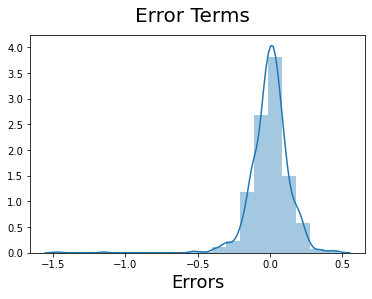

In [129]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnst), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)       

In [130]:
#evalate model
r2 = r2_score(y_true = y_train,y_pred = y_train_cnst)
round(r2,2)

0.89

In [133]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_train - y_train_cnst))
print(rss)
mse = mean_squared_error(y_train, y_train_cnst)
print(mse)
rmse = mse**0.5
print(rmse)

18.10955315045252
0.017737074584184644
0.13318060888952507


In [135]:
X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [136]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [137]:
#evalate model
r2 = r2_score(y_true = y_test,y_pred = y_pred)
round(r2,2)

0.87

In [138]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_test - y_pred))
print(rss)
mse = mean_squared_error(y_test, y_pred)
print(mse)
rmse = mse**0.5
print(rmse)

9.417159774349452
0.021500364781619753
0.14663002687587476


Text(0, 0.5, 'y_pred')

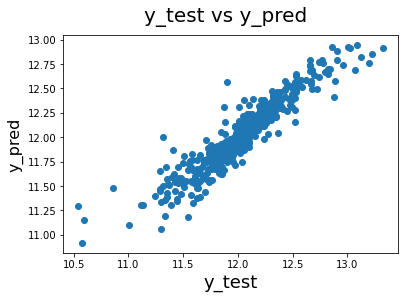

In [139]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  

# Linear regression using all features

In [140]:
#adding a constant variable
X_train_lm = sm.add_constant(X_train)

#create a RFE model
lm = sm.OLS(y_train,X_train_lm).fit()  #Running the linear Model

#Get the Summary of Linear Model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     72.60
Date:                Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                        10:08:39   Log-Likelihood:                 738.98
No. Observations:                1021   AIC:                            -1220.
Df Residuals:                     892   BIC:                            -584.2
Df Model:                         128                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   10.5324      0.153     68.979      0.000      10.233      10.832
LotFrontage             -0.0062      0.006     -1.032      0.302      -0.018       0.006
LotArea                  0.0189      0.005      3.602      0.000       0.009       0.029
OverallQual              0.0517      0.006      8.260      0.000       0.039       0.064
OverallCond              0.0355      0.005      6.838      0.000       0.025       0.046
YearRemodAdd             0.0200      0.007      2.829      0.005       0.006       0.034
MasVnrArea              -0.0061      0.006     -0.957      0.339      -0.019       0.006
BsmtFinSF1               0.0006      0.006      0.096      0.924      -0.011       0.012
BsmtFinSF2              -0.0013      0.004     -0.297      0.767      -0.010       0.007
BsmtUnfSF                0.0046      0.005      0.893      0.372      -0.005       0.015
TotalBsmtSF              0.0045      0.008      0.591      0.555      -0.011       0.020
1stFlrSF                 0.0282      0.009      2.977      0.003       0.010       0.047
2ndFlrSF                 0.0416      0.011      3.918      0.000       0.021       0.062
LowQualFinSF             0.0029      0.005      0.594      0.553      -0.007       0.013
GrLivArea                0.0554      0.008      7.263      0.000       0.040       0.070
BsmtFullBath             0.0258      0.006      4.100      0.000       0.013       0.038
BsmtHalfBath             0.0052      0.005      1.160      0.247      -0.004       0.014
FullBath                 0.0217      0.008      2.853      0.004       0.007       0.037
HalfBath                 0.0170      0.007      2.533      0.011       0.004       0.030
BedroomAbvGr             0.0116      0.007      1.673      0.095      -0.002       0.025
KitchenAbvGr            -0.0209      0.006     -3.673      0.000      -0.032      -0.010
TotRmsAbvGrd             0.0268      0.010      2.746      0.006       0.008       0.046
Fireplaces              -0.0050      0.009     -0.549      0.583      -0.023       0.013
GarageYrBlt             -0.0026      0.009     -0.298      0.766      -0.020       0.015
GarageCars               0.0363      0.011      3.282      0.001       0.015       0.058
GarageArea               0.0140      0.011      1.246      0.213      -0.008       0.036
WoodDeckSF               0.0107      0.005      2.280      0.023       0.001       0.020
OpenPorchSF             -0.0041      0.005     -0.853      0.394      -0.013       0.005
EnclosedPorch            0.0099      0.005      2.035      0.042       0.000       0.020
3SsnPorch                0.0063      0.004      1.467      0.143      -0.002       0.015
ScreenPorch              0.0084      0.004      1.954      0.051   -3.83e-05       0.017
PoolArea                -0.0134      0.005     -2.795    

In [141]:
y_train_cnst = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

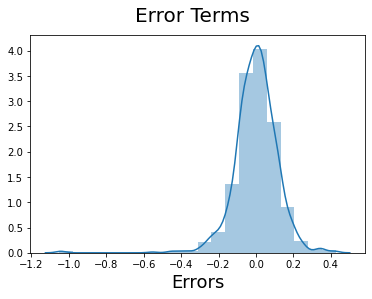

In [142]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnst), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)    

In [143]:
r2 = r2_score(y_true = y_train,y_pred = y_train_cnst)
round(r2,2)

0.91

In [144]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_train - y_train_cnst))
print(rss)
mse = mean_squared_error(y_train, y_train_cnst)
print(mse)
rmse = mse**0.5
print(rmse)

14.056602883116412
0.013767485683757505
0.11733492951273079


In [145]:
# Adding a constant variable 
X_test_n = sm.add_constant(X_test)

In [146]:
# Making predictions
y_pred = lm.predict(X_test_n)

In [147]:
#evalate model
r2 = r2_score(y_true = y_test,y_pred = y_pred)
round(r2,2)

0.88

In [148]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_test - y_pred))
print(rss)
mse = mean_squared_error(y_test, y_pred)
print(mse)
rmse = mse**0.5
print(rmse)

8.880636547261606
0.02027542590698997
0.14239180421284775


Text(0, 0.5, 'y_pred')

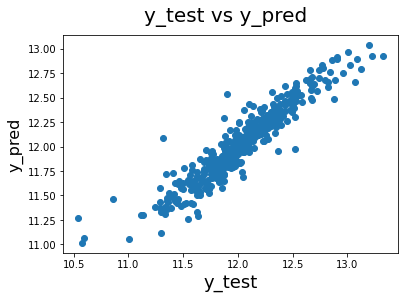

In [149]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  

# Ridge

## Using Features from RFE

In [155]:
# Ridge Regularization

# considering different values of alpha for hyperparameter tuning
params = {'alpha': [0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# Creating object of Ridge regression
ridge = Ridge()

# Selecting k-fold for hyperparameter tuning
kfold = KFold(n_splits = 5, shuffle = True, random_state = 100)

# Performing HyperParameter tuning for choosing optimal value of alpha
ridge_grid_search = GridSearchCV(estimator = ridge
                            , param_grid = params
                            , scoring = 'neg_mean_squared_error'
                            , cv = kfold
                            , verbose = 1
                            , n_jobs = -1
                            , return_train_score = True)


ridge_grid_search.fit(X_train_rfe,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 120 out of 135 | elapsed:    3.9s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    3.9s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [156]:
# Creating dataframe for the cross validation
ridge_gridsearchcv= pd.DataFrame(ridge_grid_search.cv_results_)

ridge_gridsearchcv

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.080480      0.005187         0.004190        0.000399       0.001   
1        0.055908      0.029120         0.004190        0.000399        0.01   
2        0.011369      0.002149         0.006781        0.003116        0.05   
3        0.007780      0.000746         0.004189        0.000399         0.1   
4        0.007381      0.000490         0.003589        0.000488         0.2   
5        0.010572      0.004397         0.003989        0.000892         0.3   
6        0.007181      0.000975         0.006386        0.002570         0.4   
7        0.006982      0.001262         0.003990        0.000002         0.5   
8        0.006182      0.000747         0.003391        0.000798         0.6   
9        0.006783      0.000746         0.004988        0.002598         0.7   
10       0.007978      0.000892         0.004787        0.001596         0.8   
11       0.006783      0.000748         0.005982        0.003568         0.9   
12       0.007580      0.000489         0.004386        0.001352           1   
13       0.007580      0.001354         0.005385        0.002491           2   
14       0.006984      0.000002         0.004188        0.001161           3   
15       0.007578      0.000488         0.004190        0.000746           4   
16       0.008380      0.002861         0.003987        0.000635           5   
17       0.006785      0.000744         0.003786        0.000749           6   
18       0.008976      0.003990         0.003990        0.001094           7   
19       0.006983      0.000631         0.004187        0.000746           8   
20       0.007978      0.002093         0.006582        0.005698           9   
21       0.007181      0.000398         0.003791        0.000743          10   
22       0.008377      0.002326         0.005585        0.003711          20   
23       0.018750      0.022070         0.003989        0.000629          50   
24       0.008577      0.003191         0.003992        0.000004         100   
25       0.007580      0.001196         0.004189        0.000401         500   
26       0.007780      0.001596         0.005785        0.002221        1000   

              params  split0_test_score  split1_test_score  split2_test_score  \
0   {'alpha': 0.001}          -0.044283          -0.020450          -0.015615   
1    {'alpha': 0.01}          -0.044252          -0.020451          -0.015557   
2    {'alpha': 0.05}          -0.044125          -0.020455          -0.015323   
3     {'alpha': 0.1}          -0.043991          -0.020461          -0.015077   
4     {'alpha': 0.2}          -0.043786          -0.020474          -0.014702   
5     {'alpha': 0.3}          -0.043642          -0.020486          -0.014435   
6     {'alpha': 0.4}          -0.043540          -0.020499          -0.014241   
7     {'alpha': 0.5}          -0.043468          -0.020512          -0.014098   
8     {'alpha': 0.6}          -0.043419          -0.020525          -0.013990   
9     {'alpha': 0.7}          -0.043385          -0.020537          -0.013908   
10    {'alpha': 0.8}          -0.043364          -0.020550          -0.013845   
11    {'alpha': 0.9}          -0.043352          -0.020562          -0.013796   
12    {'alpha': 1.0}          -0.043347          -0.020575          -0.013759   
13    {'alpha': 2.0}          -0.043459          -0.020692          -0.013652   
14    {'alpha': 3.0}          -0.043638          -0.020803          -0.013688   
15    {'alpha': 4.0}          -0.043803          -0.020906          -0.013749   
16    {'alpha': 5.0}          -0.043950          -0.021003          -0.013813   
17    {'alpha': 6.0}          -0.044078          -0.021094          -0.013875   
18    {'alpha': 7.0}          -0.044191          -0.021179          -0.013934   
19    {'alpha': 8.0}          -0.044292          -0.021259          -0.013990   
20    {'alpha': 9.0}          -0.044382          -0.021333    

In [157]:
ridge_fin = ridge_grid_search.best_estimator_
ridge_fin

Ridge(alpha=3.0)

In [158]:
ridge_grid_search.best_score_

-0.02294546574011457

In [159]:
ridge_grid_search.best_params_

{'alpha': 3.0}

In [160]:
ridge_fin.fit(X_train_rfe, y_train)

Ridge(alpha=3.0)

In [161]:
y_train_predicted = ridge_fin.predict(X_train_rfe)

In [162]:
def evaluations(y_true, y_predicted):  
   
    # Calculating Mean Squared error
    mse = mean_squared_error(y_true, y_predicted)
    
    # Calculating Root Mean Squared error
    rmse = np.sqrt(mean_squared_error(y_true, y_predicted))
    
    # Calculating r2 Score
    r2_square = r2_score(y_true, y_predicted)
    
    print("Evaluation metrics")
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square:', r2_square)

In [163]:
evaluations(y_train, y_train_predicted)

Evaluation metrics
MSE: 0.018376459847728857
RMSE: 0.13555980173978147
R2 Square: 0.8830948758910697


In [164]:
# Creating empty dataframe
ridge_coef_df = pd.DataFrame()

# Creating 'Features' column of dataframe and populating data
ridge_coef_df['Features'] = X_train_rfe.columns

# Creating 'Coefficient' column of dataframe and populating data 
ridge_coef_df['Coefficient'] = list(ridge_fin.coef_)

# Diaplaying the dataframe of Regression model parameters
ridge_coef_df

Features  Coefficient
0            OverallQual     0.069360
1            OverallCond     0.037665
2           YearRemodAdd     0.031416
3             BsmtFinSF1     0.009679
4            TotalBsmtSF     0.003856
5               1stFlrSF     0.068571
6               2ndFlrSF     0.066389
7              GrLivArea     0.041318
8           BsmtFullBath     0.031755
9             GarageCars     0.058810
10              BsmtQual     0.040954
11           KitchenQual     0.027392
12           MSZoning_FV     0.142559
13           MSZoning_RH     0.144995
14           MSZoning_RL     0.209062
15           MSZoning_RM     0.076545
16          LotShape_IR3    -0.094280
17         LotConfig_FR2    -0.033452
18   Neighborhood_BrDale    -0.013695
19  Neighborhood_BrkSide     0.041460
20  Neighborhood_ClearCr     0.142949
21  Neighborhood_CollgCr     0.047531
22  Neighborhood_Crawfor     0.131818
23  Neighborhood_Edwards    -0.071799
24  Neighborhood_Gilbert     0.051672
25  Neighborhood_MeadowV    -0.088332
26  Neighborhood_NoRidge     0.127090
27  Neighborhood_NridgHt     0.139765
28  Neighborhood_SawyerW     0.024223
29  Neighborhood_Somerst     0.146026
30  Neighborhood_StoneBr     0.078235
31   Neighborhood_Timber     0.072793
32  Neighborhood_Veenker     0.083680
33     HouseStyle_2Story    -0.031828
34   Exterior1st_AsphShn     0.003095
35   Exterior1st_BrkComm    -0.086752
36   Exterior1st_BrkFace     0.111215
37    Exterior1st_CBlock    -0.015172
38   Exterior1st_CemntBd    -0.002943
39   Exterior1st_WdShing     0.051652
40   Exterior2nd_AsphShn     0.003095
41    Exterior2nd_CBlock    -0.015172
42   Exterior2nd_CmentBd     0.018461
43   Exterior2nd_Wd Shng    -0.085673
44      Foundation_PConc     0.021853
45      Foundation_Stone     0.016889
46    GarageType_Basment    -0.055479
47     GarageType_Detchd    -0.072278
48         GarageType_No    -0.020628
49       GarageFinish_No    -0.020628

In [165]:
ridge_coef_df.reindex(ridge_coef_df['Coefficient'].abs().sort_values(ascending=False).index).head(10)

Features  Coefficient
14           MSZoning_RL     0.209062
29  Neighborhood_Somerst     0.146026
13           MSZoning_RH     0.144995
20  Neighborhood_ClearCr     0.142949
12           MSZoning_FV     0.142559
27  Neighborhood_NridgHt     0.139765
22  Neighborhood_Crawfor     0.131818
26  Neighborhood_NoRidge     0.127090
36   Exterior1st_BrkFace     0.111215
16          LotShape_IR3    -0.094280

In [166]:
X_test_rfe = X_test[X_train_rfe.columns]

In [167]:
y_test_predicted = ridge_fin.predict(X_test_rfe)

In [168]:
evaluations( y_test, y_test_predicted)

Evaluation metrics
MSE: 0.021367626464664415
RMSE: 0.14617669603826874
R2 Square: 0.870137283748508


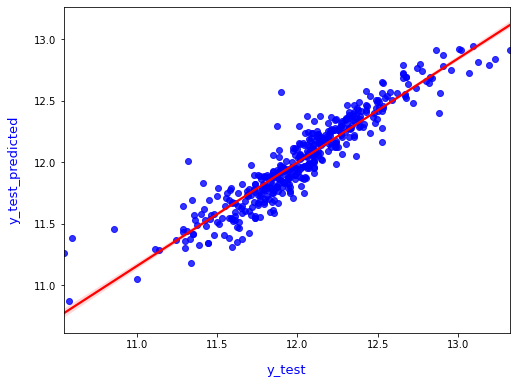

In [169]:
plt.figure(figsize=(8,6))

sns.regplot(y_test,y_test_predicted,ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
          
plt.xlabel('y_test', fontsize=13,color='blue',labelpad=14)                          
plt.ylabel('y_test_predicted', fontsize=13,color='blue',labelpad=14)     

plt.show()

## Using all features

In [170]:
params = {'alpha': [0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# Creating object of Ridge regression
ridge = Ridge()

# Selecting k-fold for hyperparameter tuning
kfold = KFold(n_splits = 5, shuffle = True, random_state = 100)

# Performing HyperParameter tuning for choosing optimal value of alpha
ridge_grid_search = GridSearchCV(estimator = ridge
                            , param_grid = params
                            , scoring = 'neg_mean_squared_error'
                            , cv = kfold
                            , verbose = 1
                            , n_jobs = -1
                            , return_train_score = True)


ridge_grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    0.5s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [171]:
ridge_gridsearchcv_tot= pd.DataFrame(ridge_grid_search.cv_results_)

ridge_gridsearchcv_tot

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.020148      0.007258         0.004787    3.993034e-04       0.001   
1        0.012567      0.001621         0.006781    3.178909e-03        0.01   
2        0.013763      0.001163         0.004987    7.168434e-07        0.05   
3        0.028924      0.022856         0.011803    1.216137e-02         0.1   
4        0.022576      0.019251         0.005021    6.867380e-04         0.2   
5        0.012709      0.001250         0.012602    9.210487e-03         0.3   
6        0.024572      0.024244         0.006383    1.494554e-03         0.4   
7        0.017753      0.006476         0.005184    3.992084e-04         0.5   
8        0.013962      0.002601         0.005291    1.157003e-03         0.6   
9        0.011975      0.001751         0.004987    1.259470e-03         0.7   
10       0.012368      0.001017         0.004986    6.300737e-04         0.8   
11       0.011769      0.000399         0.004787    3.994952e-04         0.9   
12       0.012169      0.000399         0.004986    6.106495e-07           1   
13       0.013364      0.001740         0.013405    1.443894e-02           2   
14       0.011955      0.000632         0.005185    3.979462e-04           3   
15       0.020782      0.014215         0.008577    5.733338e-03           4   
16       0.012805      0.000950         0.005385    4.894950e-04           5   
17       0.012966      0.001261         0.005983    2.523909e-03           6   
18       0.015160      0.003534         0.004587    4.882469e-04           7   
19       0.012366      0.000799         0.005585    1.351510e-03           8   
20       0.016758      0.004251         0.005383    7.987083e-04           9   
21       0.013164      0.001467         0.005388    4.913698e-04          10   
22       0.014162      0.002918         0.006184    1.465409e-03          20   
23       0.012368      0.000489         0.004788    7.476312e-04          50   
24       0.012965      0.000629         0.007379    3.815767e-03         100   
25       0.012966      0.000630         0.005387    1.350866e-03         500   
26       0.012762      0.001936         0.003988    1.092537e-03        1000   

              params  split0_test_score  split1_test_score  split2_test_score  \
0   {'alpha': 0.001}          -0.044998          -0.021960          -0.018851   
1    {'alpha': 0.01}          -0.044958          -0.021939          -0.018745   
2    {'alpha': 0.05}          -0.044835          -0.021862          -0.018342   
3     {'alpha': 0.1}          -0.044744          -0.021788          -0.017950   
4     {'alpha': 0.2}          -0.044648          -0.021681          -0.017395   
5     {'alpha': 0.3}          -0.044606          -0.021601          -0.017024   
6     {'alpha': 0.4}          -0.044590          -0.021537          -0.016762   
7     {'alpha': 0.5}          -0.044588          -0.021482          -0.016569   
8     {'alpha': 0.6}          -0.044594          -0.021435          -0.016422   
9     {'alpha': 0.7}          -0.044606          -0.021392          -0.016308   
10    {'alpha': 0.8}          -0.044620          -0.021353          -0.016216   
11    {'alpha': 0.9}          -0.044637          -0.021318          -0.016141   
12    {'alpha': 1.0}          -0.044655          -0.021284          -0.016079   
13    {'alpha': 2.0}          -0.044843          -0.021036          -0.015777   
14    {'alpha': 3.0}          -0.045006          -0.020873          -0.015665   
15    {'alpha': 4.0}          -0.045141          -0.020757          -0.015603   
16    {'alpha': 5.0}          -0.045256          -0.020669          -0.015563   
17    {'alpha': 6.0}          -0.045355          -0.020602          -0.015535   
18    {'alpha': 7.0}          -0.045444          -0.020549          -0.015515   
19    {'alpha': 8.0}          -0.045523          -0.020508          -0.015500   
20    {'alpha': 9.0}          -0.045594          -0.020474    

In [172]:
ridge_final = ridge_grid_search.best_estimator_
ridge_final

Ridge(alpha=10.0)

In [173]:
ridge_grid_search.best_score_

-0.02371739283790722

In [174]:
y_train_predicted = ridge_final.predict(X_train)

In [175]:
evaluations(y_train, y_train_predicted)

Evaluation metrics
MSE: 0.01516438903528843
RMSE: 0.12314377383890925
R2 Square: 0.9035290367733372


In [176]:
ridge_coef_df = pd.DataFrame()

# Creating 'Features' column of dataframe and populating data
ridge_coef_df['Features'] = X_train.columns

# Creating 'Coefficient' column of dataframe and populating data 
ridge_coef_df['Coefficient'] = list(ridge_final.coef_)

# Diaplaying the dataframe of Regression model parameters
ridge_coef_df

Features  Coefficient
0             LotFrontage    -0.001568
1                 LotArea     0.018772
2             OverallQual     0.060493
3             OverallCond     0.040517
4            YearRemodAdd     0.018694
5              MasVnrArea    -0.000839
6              BsmtFinSF1    -0.000015
7              BsmtFinSF2    -0.000191
8               BsmtUnfSF     0.002693
9             TotalBsmtSF     0.002546
10               1stFlrSF     0.032356
11               2ndFlrSF     0.036720
12           LowQualFinSF    -0.000035
13              GrLivArea     0.054247
14           BsmtFullBath     0.026751
15           BsmtHalfBath     0.002008
16               FullBath     0.021545
17               HalfBath     0.016820
18           BedroomAbvGr     0.015956
19           KitchenAbvGr    -0.017267
20           TotRmsAbvGrd     0.022059
21             Fireplaces    -0.001580
22            GarageYrBlt    -0.008383
23             GarageCars     0.038097
24             GarageArea     0.013135
25             WoodDeckSF     0.010926
26            OpenPorchSF    -0.003849
27          EnclosedPorch     0.009655
28              3SsnPorch     0.006724
29            ScreenPorch     0.009245
30               PoolArea    -0.016276
31                MiscVal    -0.002444
32                 MoSold     0.000410
33               HouseAge    -0.037842
34              ExterQual    -0.000369
35               BsmtQual     0.022274
36           BsmtExposure     0.020459
37           BsmtFinType1     0.010634
38              HeatingQC     0.009370
39            KitchenQual     0.026089
40            FireplaceQu     0.015741
41            MSZoning_FV     0.056626
42            MSZoning_RH     0.041772
43            MSZoning_RL     0.078730
44            MSZoning_RM     0.012769
45           LotShape_IR2     0.022682
46           LotShape_IR3    -0.059269
47           LotShape_Reg     0.000771
48      LotConfig_CulDSac     0.033970
49          LotConfig_FR2    -0.036504
50          LotConfig_FR3    -0.014922
51       LotConfig_Inside     0.001215
52   Neighborhood_Blueste    -0.008191
53    Neighborhood_BrDale    -0.043826
54   Neighborhood_BrkSide     0.032039
55   Neighborhood_ClearCr     0.056890
56   Neighborhood_CollgCr    -0.004066
57   Neighborhood_Crawfor     0.102831
58   Neighborhood_Edwards    -0.070547
59   Neighborhood_Gilbert    -0.013269
60    Neighborhood_IDOTRR    -0.064279
61   Neighborhood_MeadowV    -0.061804
62   Neighborhood_Mitchel    -0.009333
63     Neighborhood_NAmes     0.000122
64   Neighborhood_NPkVill    -0.024876
65    Neighborhood_NWAmes    -0.020904
66   Neighborhood_NoRidge     0.062785
67   Neighborhood_NridgHt     0.086482
68   Neighborhood_OldTown    -0.020415
69     Neighborhood_SWISU    -0.000299
70    Neighborhood_Sawyer    -0.030418
71   Neighborhood_SawyerW    -0.006144
72   Neighborhood_Somerst     0.078771
73   Neighborhood_StoneBr     0.046040
74    Neighborhood_Timber    -0.013110
75   Neighborhood_Veenker     0.032940
76      HouseStyle_1.5Unf     0.005753
77      HouseStyle_1Story     0.026515
78      HouseStyle_2.5Fin    -0.016549
79      HouseStyle_2.5Unf     0.006072
80      HouseStyle_2Story    -0.041426
81      HouseStyle_SFoyer    -0.017951
82        HouseStyle_SLvl    -0.019252
83        RoofStyle_Gable    -0.022762
84      RoofStyle_Gambrel     0.008707
85          RoofStyle_Hip    -0.007380
86      RoofStyle_Mansard     0.004017
87         RoofStyle_Shed     0.001976
88    Exterior1st_AsphShn     0.000120
89    Exterior1st_BrkComm    -0.026000
90    Exterior1st_BrkFace     0.059335
91     Exterior1st_CBlock    -0.004051
92    Exterior1st_CemntBd    -0.002859
93    Exterior1st_HdBoard     0.003237
94    Exterior1st_ImStucc     0.004325
95    Exterior1st_MetalSd     0.007579
96    Exterior1st_Plywood     0.007023
97      Exterior1st_Stone    -0.006269
98     Exterior1st_Stucco    -0.013284
99    Exterior1st_VinylSd     0.019406
100   Exterior1st_Wd Sdng    -0.013642
101   Exterior1st_WdShing     0.004893


In [303]:
top10_ridge_df=ridge_coef_df.reindex(ridge_coef_df['Coefficient'].abs().sort_values(ascending=False).index).head(10)

In [304]:
top5_ridge_features = top10_ridge_df['Features'].iloc[:5].to_list()
top5_ridge_features

['Neighborhood_Crawfor',
 'Neighborhood_NridgHt',
 'Neighborhood_Somerst',
 'MSZoning_RL',
 'Neighborhood_Edwards']

In [178]:
X_test_rfe = X_test

In [179]:
y_test_predicted = ridge_final.predict(X_test)

In [180]:
evaluations( y_test, y_test_predicted)

Evaluation metrics
MSE: 0.02027493402386717
RMSE: 0.14239007698525613
R2 Square: 0.8767781714776183


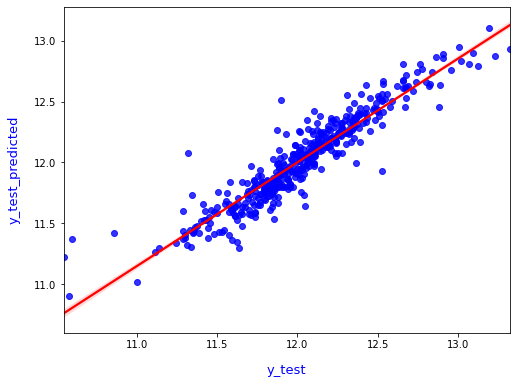

In [181]:
plt.figure(figsize=(8,6))

sns.regplot(y_test,y_test_predicted,ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
          
plt.xlabel('y_test', fontsize=13,color='blue',labelpad=14)                          
plt.ylabel('y_test_predicted', fontsize=13,color='blue',labelpad=14)     

plt.show()

# Lasso

In [182]:
params = {'alpha': [0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# Creating object of Ridge regression
lasso = Lasso()

# Selecting k-fold for hyper parameter tuning
kfold = KFold(n_splits = 5, shuffle = True, random_state = 100)

# Performing Hyper Parameter tuning for choosing optimal value of alpha
lasso_grid_search = GridSearchCV(estimator = lasso
                            , param_grid = params
                            , scoring = 'neg_mean_squared_error'
                            , cv = kfold
                            , verbose = 1
                            , n_jobs = -1
                            , return_train_score = True)


lasso_grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    0.5s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [183]:
# Creating dataframe for the cross validation
lasso_result = pd.DataFrame(lasso_grid_search.cv_results_)

# Displaying the resultant dataframe
lasso_result

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.037102      0.012106         0.005585        0.000798       0.001   
1        0.014362      0.000798         0.004988        0.000631        0.01   
2        0.015759      0.001827         0.006182        0.001466        0.05   
3        0.016225      0.006050         0.004987        0.000631         0.1   
4        0.012402      0.000826         0.005585        0.001195         0.2   
5        0.014196      0.003330         0.006615        0.002332         0.3   
6        0.012567      0.001017         0.005984        0.002091         0.4   
7        0.012569      0.000800         0.007976        0.006017         0.5   
8        0.013764      0.004653         0.006384        0.002324         0.6   
9        0.012366      0.001353         0.004787        0.000747         0.7   
10       0.013764      0.004653         0.005385        0.001017         0.8   
11       0.015758      0.008681         0.004788        0.000398         0.9   
12       0.012766      0.003241         0.005983        0.001262           1   
13       0.018751      0.011690         0.005185        0.000398           2   
14       0.021743      0.012994         0.005186        0.000746           3   
15       0.012368      0.001493         0.005185        0.000398           4   
16       0.014067      0.002683         0.005186        0.000746           5   
17       0.013270      0.003357         0.009675        0.009403           6   
18       0.014860      0.004215         0.005989        0.002521           7   
19       0.013270      0.001880         0.005982        0.001260           8   
20       0.011072      0.000664         0.004987        0.000001           9   
21       0.015963      0.009001         0.005389        0.000487          10   
22       0.011968      0.001093         0.005187        0.000399          20   
23       0.012366      0.000488         0.006582        0.003711          50   
24       0.013365      0.001954         0.005984        0.001545         100   
25       0.012168      0.000976         0.005984        0.001543         500   
26       0.012168      0.000746         0.004586        0.001018        1000   

              params  split0_test_score  split1_test_score  split2_test_score  \
0   {'alpha': 0.001}          -0.046968          -0.020395          -0.015003   
1    {'alpha': 0.01}          -0.048120          -0.022545          -0.017267   
2    {'alpha': 0.05}          -0.044942          -0.027262          -0.028295   
3     {'alpha': 0.1}          -0.054452          -0.037958          -0.043882   
4     {'alpha': 0.2}          -0.084009          -0.054946          -0.072233   
5     {'alpha': 0.3}          -0.117941          -0.073542          -0.106757   
6     {'alpha': 0.4}          -0.161013          -0.099862          -0.151754   
7     {'alpha': 0.5}          -0.179795          -0.123615          -0.169445   
8     {'alpha': 0.6}          -0.179795          -0.123615          -0.169445   
9     {'alpha': 0.7}          -0.179795          -0.123615          -0.169445   
10    {'alpha': 0.8}          -0.179795          -0.123615          -0.169445   
11    {'alpha': 0.9}          -0.179795          -0.123615          -0.169445   
12    {'alpha': 1.0}          -0.179795          -0.123615          -0.169445   
13    {'alpha': 2.0}          -0.179795          -0.123615          -0.169445   
14    {'alpha': 3.0}          -0.179795          -0.123615          -0.169445   
15    {'alpha': 4.0}          -0.179795          -0.123615          -0.169445   
16    {'alpha': 5.0}          -0.179795          -0.123615          -0.169445   
17    {'alpha': 6.0}          -0.179795          -0.123615          -0.169445   
18    {'alpha': 7.0}          -0.179795          -0.123615          -0.169445   
19    {'alpha': 8.0}          -0.179795          -0.123615          -0.169445   
20    {'alpha': 9.0}          -0.179795          -0.123615    

In [184]:
def getalphaplot(cv_result, scale = 'log'):

    # Setting figuresize
    plt.figure(figsize=(8,5))
    
    # Plotting Line plot using matplotlib library for param_alpha vs. mean_train_score
    plt.plot(cv_result['param_alpha'].astype('float32'), cv_result['mean_train_score'])
    
    # Plotting Line plot using matplotlib library for param_alpha vs. mean_test_score
    plt.plot(cv_result['param_alpha'].astype('float32'), cv_result['mean_test_score'])
    
    
    # Setting axis label and display parameters
    plt.xlabel('Alpha',fontsize = 16, color = 'blue', labelpad = 20)
    plt.ylabel('Negative Mean Squared Error',fontsize = 16, color = 'blue', labelpad = 20)
    
    # Setting scale
    if scale != '':
        plt.xscale(scale)
    
    # Setting legend
    plt.legend(['train score', 'test score'], loc='upper right')
    
    # Showing the plot using matplotlib.pyplot show() function 
    plt.show()

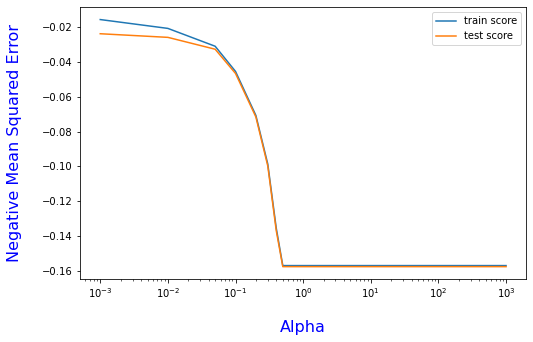

In [185]:
getalphaplot(lasso_result)

In [186]:
# Storing best estimator in a variable
lasso_best = lasso_grid_search.best_estimator_

# Displaying the best estimator variable
lasso_best

Lasso(alpha=0.001)

In [270]:
lasso_best.fit(X_train, y_train)

Lasso(alpha=0.001)

In [271]:
y_train_predicted = lasso_best.predict(X_train)

In [272]:
evaluations( y_train, y_train_predicted)

Evaluation metrics
MSE: 0.016308351547851443
RMSE: 0.1277041563452476
R2 Square: 0.8962515153891697


In [273]:
# Creating empty dataframe
lasso_coef_df = pd.DataFrame()

# Creating 'Features' column of dataframe and populating data
lasso_coef_df['Features'] = X_train.columns

# Creating 'Coefficient' column of dataframe and populating data 
lasso_coef_df['Coefficient'] = list(lasso_best.coef_)

# Diaplaying the dataframe of Regression model parameters
lasso_coef_df

Features  Coefficient
0             LotFrontage    -0.000000
1                 LotArea     0.018284
2             OverallQual     0.063924
3             OverallCond     0.041533
4            YearRemodAdd     0.015846
5              MasVnrArea     0.000000
6              BsmtFinSF1    -0.000000
7              BsmtFinSF2     0.000000
8               BsmtUnfSF     0.001009
9             TotalBsmtSF     0.004977
10               1stFlrSF     0.001387
11               2ndFlrSF     0.000000
12           LowQualFinSF    -0.001471
13              GrLivArea     0.104578
14           BsmtFullBath     0.025529
15           BsmtHalfBath     0.000666
16               FullBath     0.015504
17               HalfBath     0.013496
18           BedroomAbvGr     0.014628
19           KitchenAbvGr    -0.013364
20           TotRmsAbvGrd     0.016453
21             Fireplaces     0.000000
22            GarageYrBlt    -0.001960
23             GarageCars     0.042170
24             GarageArea     0.006412
25             WoodDeckSF     0.010528
26            OpenPorchSF    -0.001819
27          EnclosedPorch     0.007160
28              3SsnPorch     0.005802
29            ScreenPorch     0.010033
30               PoolArea    -0.018412
31                MiscVal    -0.001001
32                 MoSold     0.000000
33               HouseAge    -0.043774
34              ExterQual     0.000000
35               BsmtQual     0.016506
36           BsmtExposure     0.018903
37           BsmtFinType1     0.010502
38              HeatingQC     0.011123
39            KitchenQual     0.025544
40            FireplaceQu     0.015175
41            MSZoning_FV     0.030307
42            MSZoning_RH     0.000000
43            MSZoning_RL     0.075578
44            MSZoning_RM    -0.000000
45           LotShape_IR2     0.000000
46           LotShape_IR3    -0.025869
47           LotShape_Reg    -0.000000
48      LotConfig_CulDSac     0.025815
49          LotConfig_FR2    -0.002815
50          LotConfig_FR3    -0.000000
51       LotConfig_Inside     0.000000
52   Neighborhood_Blueste    -0.000000
53    Neighborhood_BrDale    -0.000000
54   Neighborhood_BrkSide     0.019342
55   Neighborhood_ClearCr     0.050667
56   Neighborhood_CollgCr    -0.000000
57   Neighborhood_Crawfor     0.103492
58   Neighborhood_Edwards    -0.062473
59   Neighborhood_Gilbert    -0.000000
60    Neighborhood_IDOTRR    -0.031044
61   Neighborhood_MeadowV    -0.003051
62   Neighborhood_Mitchel    -0.000000
63     Neighborhood_NAmes     0.000000
64   Neighborhood_NPkVill    -0.000000
65    Neighborhood_NWAmes    -0.000000
66   Neighborhood_NoRidge     0.053324
67   Neighborhood_NridgHt     0.072029
68   Neighborhood_OldTown    -0.000000
69     Neighborhood_SWISU     0.000000
70    Neighborhood_Sawyer    -0.008270
71   Neighborhood_SawyerW    -0.000000
72   Neighborhood_Somerst     0.086155
73   Neighborhood_StoneBr     0.002508
74    Neighborhood_Timber    -0.000000
75   Neighborhood_Veenker     0.000000
76      HouseStyle_1.5Unf     0.000000
77      HouseStyle_1Story     0.032509
78      HouseStyle_2.5Fin    -0.000000
79      HouseStyle_2.5Unf     0.000000
80      HouseStyle_2Story    -0.026691
81      HouseStyle_SFoyer    -0.000000
82        HouseStyle_SLvl    -0.000000
83        RoofStyle_Gable    -0.007827
84      RoofStyle_Gambrel     0.000000
85          RoofStyle_Hip     0.000000
86      RoofStyle_Mansard     0.000000
87         RoofStyle_Shed     0.000000
88    Exterior1st_AsphShn    -0.000000
89    Exterior1st_BrkComm    -0.000000
90    Exterior1st_BrkFace     0.054447
91     Exterior1st_CBlock    -0.000000
92    Exterior1st_CemntBd    -0.000000
93    Exterior1st_HdBoard    -0.000000
94    Exterior1st_ImStucc     0.000000
95    Exterior1st_MetalSd     0.000000
96    Exterior1st_Plywood     0.000000
97      Exterior1st_Stone    -0.000000
98     Exterior1st_Stucco    -0.000000
99    Exterior1st_VinylSd     0.005665
100   Exterior1st_Wd Sdng    -0.000000
101   Exterior1st_WdShing     0.000000


In [191]:
top10_lasso_df = lasso_coef_df.reindex(lasso_coef_df['Coefficient'].abs().sort_values(ascending=False).index).head(10)

# Displaying dataframe with top 10 feature returned from lasso model
top10_lasso_df

Features  Coefficient
13             GrLivArea     0.104578
57  Neighborhood_Crawfor     0.103492
72  Neighborhood_Somerst     0.086155
43           MSZoning_RL     0.075578
67  Neighborhood_NridgHt     0.072029
2            OverallQual     0.063924
58  Neighborhood_Edwards    -0.062473
90   Exterior1st_BrkFace     0.054447
66  Neighborhood_NoRidge     0.053324
55  Neighborhood_ClearCr     0.050667

In [192]:
top5_lasso_features = top10_lasso_df['Features'].iloc[:5].to_list()
top5_lasso_features

['GrLivArea',
 'Neighborhood_Crawfor',
 'Neighborhood_Somerst',
 'MSZoning_RL',
 'Neighborhood_NridgHt']

In [193]:
y_test_predicted = lasso_best.predict(X_test)

In [194]:
evaluations(y_test, y_test_predicted)

Evaluation metrics
MSE: 0.0202860894353319
RMSE: 0.14242924361005327
R2 Square: 0.8767103739599057


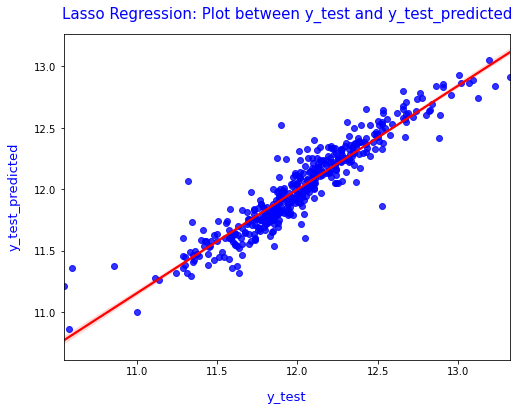

In [195]:
# Setting the figure size
plt.figure(figsize=(8,6))

#Ploting the regression plot
sns.regplot(y_test,y_test_predicted,ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

# Setting the format of the plot
plt.title('Lasso Regression: Plot between y_test and y_test_predicted', fontsize=15,color='blue',pad=15)             
plt.xlabel('y_test', fontsize=13,color='blue',labelpad=14)                          
plt.ylabel('y_test_predicted', fontsize=13,color='blue',labelpad=14)     

# Displaying the plot usong matplotlib.pyplot
plt.show()

# Subjective Questions

Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [305]:
ridge_new = Ridge(alpha = 6)

In [306]:
# Fitting the model
ridge_new.fit(X_train_rfe,y_train)

y_train_predicted_new = ridge_new.predict(X_train_rfe)

In [307]:
evaluations(y_train, y_train_predicted_new)

Evaluation metrics
MSE: 0.018831977408711374
RMSE: 0.13722965207531268
R2 Square: 0.8801970197511103


In [308]:
X_test = X_test[X_train_rfe.columns]
y_test_predicted_new = ridge_new.predict(X_test)

In [309]:
evaluations(y_test, y_test_predicted_new)

Evaluation metrics
MSE: 0.021361829591887087
RMSE: 0.14615686638638326
R2 Square: 0.8701725145049924


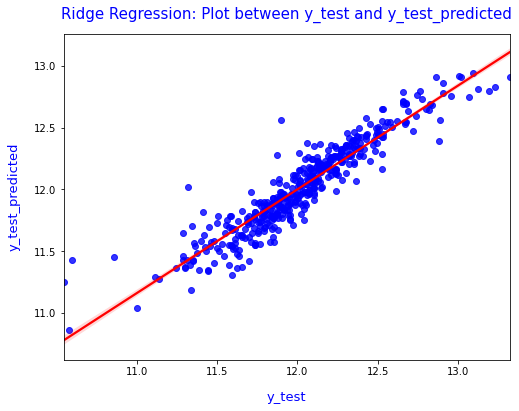

In [310]:
plt.figure(figsize=(8,6))

sns.regplot(y_test,y_test_predicted_new,ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('Ridge Regression: Plot between y_test and y_test_predicted', fontsize=15,color='blue',pad=15)             
plt.xlabel('y_test', fontsize=13,color='blue',labelpad=14)                          
plt.ylabel('y_test_predicted', fontsize=13,color='blue',labelpad=14)     

plt.show()

In [274]:
lasso_new = Lasso(alpha = 0.002)

In [275]:
lasso_new.fit(X_train, y_train)

Lasso(alpha=0.002)

In [276]:
y_train_predicted_new = lasso_new.predict(X_train)

In [277]:
evaluations(y_train, y_train_predicted_new)

Evaluation metrics
MSE: 0.017799036268927208
RMSE: 0.13341302885748155
R2 Square: 0.8867682588877175


In [278]:
y_test_predicted_new = lasso_new.predict(X_test)

In [279]:
evaluations( y_test, y_test_predicted_new)

Evaluation metrics
MSE: 0.020770786169311634
RMSE: 0.14412073469598896
R2 Square: 0.8737646076373371


In [280]:
# Creating empty dataframe
lasso_coef_df = pd.DataFrame()

# Creating 'Features' column of dataframe and populating data
lasso_coef_df['Features'] = X_train.columns

# Creating 'Coefficient' column of dataframe and populating data 
lasso_coef_df['Coefficient'] = list(lasso_best.coef_)

# Diaplaying the dataframe of Regression model parameters
lasso_coef_df

Features  Coefficient
0             LotFrontage    -0.000000
1                 LotArea     0.018284
2             OverallQual     0.063924
3             OverallCond     0.041533
4            YearRemodAdd     0.015846
5              MasVnrArea     0.000000
6              BsmtFinSF1    -0.000000
7              BsmtFinSF2     0.000000
8               BsmtUnfSF     0.001009
9             TotalBsmtSF     0.004977
10               1stFlrSF     0.001387
11               2ndFlrSF     0.000000
12           LowQualFinSF    -0.001471
13              GrLivArea     0.104578
14           BsmtFullBath     0.025529
15           BsmtHalfBath     0.000666
16               FullBath     0.015504
17               HalfBath     0.013496
18           BedroomAbvGr     0.014628
19           KitchenAbvGr    -0.013364
20           TotRmsAbvGrd     0.016453
21             Fireplaces     0.000000
22            GarageYrBlt    -0.001960
23             GarageCars     0.042170
24             GarageArea     0.006412
25             WoodDeckSF     0.010528
26            OpenPorchSF    -0.001819
27          EnclosedPorch     0.007160
28              3SsnPorch     0.005802
29            ScreenPorch     0.010033
30               PoolArea    -0.018412
31                MiscVal    -0.001001
32                 MoSold     0.000000
33               HouseAge    -0.043774
34              ExterQual     0.000000
35               BsmtQual     0.016506
36           BsmtExposure     0.018903
37           BsmtFinType1     0.010502
38              HeatingQC     0.011123
39            KitchenQual     0.025544
40            FireplaceQu     0.015175
41            MSZoning_FV     0.030307
42            MSZoning_RH     0.000000
43            MSZoning_RL     0.075578
44            MSZoning_RM    -0.000000
45           LotShape_IR2     0.000000
46           LotShape_IR3    -0.025869
47           LotShape_Reg    -0.000000
48      LotConfig_CulDSac     0.025815
49          LotConfig_FR2    -0.002815
50          LotConfig_FR3    -0.000000
51       LotConfig_Inside     0.000000
52   Neighborhood_Blueste    -0.000000
53    Neighborhood_BrDale    -0.000000
54   Neighborhood_BrkSide     0.019342
55   Neighborhood_ClearCr     0.050667
56   Neighborhood_CollgCr    -0.000000
57   Neighborhood_Crawfor     0.103492
58   Neighborhood_Edwards    -0.062473
59   Neighborhood_Gilbert    -0.000000
60    Neighborhood_IDOTRR    -0.031044
61   Neighborhood_MeadowV    -0.003051
62   Neighborhood_Mitchel    -0.000000
63     Neighborhood_NAmes     0.000000
64   Neighborhood_NPkVill    -0.000000
65    Neighborhood_NWAmes    -0.000000
66   Neighborhood_NoRidge     0.053324
67   Neighborhood_NridgHt     0.072029
68   Neighborhood_OldTown    -0.000000
69     Neighborhood_SWISU     0.000000
70    Neighborhood_Sawyer    -0.008270
71   Neighborhood_SawyerW    -0.000000
72   Neighborhood_Somerst     0.086155
73   Neighborhood_StoneBr     0.002508
74    Neighborhood_Timber    -0.000000
75   Neighborhood_Veenker     0.000000
76      HouseStyle_1.5Unf     0.000000
77      HouseStyle_1Story     0.032509
78      HouseStyle_2.5Fin    -0.000000
79      HouseStyle_2.5Unf     0.000000
80      HouseStyle_2Story    -0.026691
81      HouseStyle_SFoyer    -0.000000
82        HouseStyle_SLvl    -0.000000
83        RoofStyle_Gable    -0.007827
84      RoofStyle_Gambrel     0.000000
85          RoofStyle_Hip     0.000000
86      RoofStyle_Mansard     0.000000
87         RoofStyle_Shed     0.000000
88    Exterior1st_AsphShn    -0.000000
89    Exterior1st_BrkComm    -0.000000
90    Exterior1st_BrkFace     0.054447
91     Exterior1st_CBlock    -0.000000
92    Exterior1st_CemntBd    -0.000000
93    Exterior1st_HdBoard    -0.000000
94    Exterior1st_ImStucc     0.000000
95    Exterior1st_MetalSd     0.000000
96    Exterior1st_Plywood     0.000000
97      Exterior1st_Stone    -0.000000
98     Exterior1st_Stucco    -0.000000
99    Exterior1st_VinylSd     0.005665
100   Exterior1st_Wd Sdng    -0.000000
101   Exterior1st_WdShing     0.000000


In [281]:
top10_lasso_df_q1 = lasso_coef_df.reindex(lasso_coef_df['Coefficient'].abs().sort_values(ascending=False).index).head(10)

# Displaying dataframe with top 10 feature returned from lasso model
top10_lasso_df_q1

Features  Coefficient
13             GrLivArea     0.104578
57  Neighborhood_Crawfor     0.103492
72  Neighborhood_Somerst     0.086155
43           MSZoning_RL     0.075578
67  Neighborhood_NridgHt     0.072029
2            OverallQual     0.063924
58  Neighborhood_Edwards    -0.062473
90   Exterior1st_BrkFace     0.054447
66  Neighborhood_NoRidge     0.053324
55  Neighborhood_ClearCr     0.050667

In [282]:
top5_lasso_features_q1 = top10_lasso_df_q1['Features'].iloc[:5].to_list()
top5_lasso_features_q1

['GrLivArea',
 'Neighborhood_Crawfor',
 'Neighborhood_Somerst',
 'MSZoning_RL',
 'Neighborhood_NridgHt']

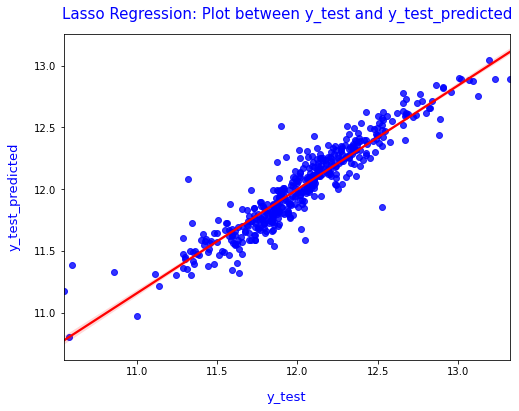

In [255]:
# Setting the figure size
plt.figure(figsize=(8,6))

#Ploting the regression plot
sns.regplot(y_test,y_test_predicted_new,ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

# Setting the format of the plot
plt.title('Lasso Regression: Plot between y_test and y_test_predicted', fontsize=15,color='blue',pad=15)             
plt.xlabel('y_test', fontsize=13,color='blue',labelpad=14)                          
plt.ylabel('y_test_predicted', fontsize=13,color='blue',labelpad=14)     

# Displaying the plot usong matplotlib.pyplot
plt.show()

Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [293]:
X_train_new = X_train.drop(top5_lasso_features, axis = 1)

In [294]:
params = {'alpha': [0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# Creating object of Ridge regression
lasso = Lasso()

# Selecting k-fold for hyper parameter tuning
kfold = KFold(n_splits = 5, shuffle = True, random_state = 100)

# Performing Hyper Parameter tuning for choosing optimal value of alpha
lasso_grid_search = GridSearchCV(estimator = lasso
                            , param_grid = params
                            , scoring = 'neg_mean_squared_error'
                            , cv = kfold
                            , verbose = 1
                            , n_jobs = -1
                            , return_train_score = True)


lasso_grid_search.fit(X_train_new,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    2.1s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [295]:
# Storing best estimator in a variable
lasso_best = lasso_grid_search.best_estimator_

# Displaying the best estimator variable
lasso_best

Lasso(alpha=0.001)

In [296]:
lasso_best.fit(X_train_new, y_train)

Lasso(alpha=0.001)

In [297]:
y_train_predicted = lasso_best.predict(X_train_new)

In [298]:
evaluations(y_train, y_train_predicted)

Evaluation metrics
MSE: 0.017374564325757274
RMSE: 0.1318126106476815
R2 Square: 0.88946861279746


In [299]:
# Creating empty dataframe
lasso_coef_df = pd.DataFrame()

# Getting the model coefficients
lasso_coef = list(lasso_best.coef_)

# Creating 'Features' column of dataframe and populating data
lasso_coef_df['Features'] = X_train_new.columns

# Creating 'Coefficient' column of dataframe and populating data 
lasso_coef_df['Coefficient'] = lasso_coef

# Diaplaying the dataframe of Regression model parameters
lasso_coef_df

Features  Coefficient
0             LotFrontage     0.000000
1                 LotArea     0.018294
2             OverallQual     0.067568
3             OverallCond     0.041788
4            YearRemodAdd     0.016159
5              MasVnrArea     0.001541
6              BsmtFinSF1    -0.000000
7              BsmtFinSF2     0.000000
8               BsmtUnfSF     0.000000
9             TotalBsmtSF     0.004857
10               1stFlrSF     0.077587
11               2ndFlrSF     0.073489
12           LowQualFinSF     0.004443
13           BsmtFullBath     0.024906
14           BsmtHalfBath     0.000023
15               FullBath     0.018418
16               HalfBath     0.013932
17           BedroomAbvGr     0.013187
18           KitchenAbvGr    -0.015128
19           TotRmsAbvGrd     0.022168
20             Fireplaces     0.000000
21            GarageYrBlt    -0.004152
22             GarageCars     0.040327
23             GarageArea     0.010343
24             WoodDeckSF     0.009080
25            OpenPorchSF    -0.002216
26          EnclosedPorch     0.006159
27              3SsnPorch     0.006050
28            ScreenPorch     0.009523
29               PoolArea    -0.018696
30                MiscVal    -0.001018
31                 MoSold     0.000000
32               HouseAge    -0.036365
33              ExterQual     0.003329
34               BsmtQual     0.020116
35           BsmtExposure     0.017847
36           BsmtFinType1     0.010295
37              HeatingQC     0.010988
38            KitchenQual     0.030651
39            FireplaceQu     0.018042
40            MSZoning_FV     0.024350
41            MSZoning_RH     0.000000
42            MSZoning_RM    -0.069100
43           LotShape_IR2     0.000000
44           LotShape_IR3    -0.040048
45           LotShape_Reg    -0.000000
46      LotConfig_CulDSac     0.023097
47          LotConfig_FR2    -0.004288
48          LotConfig_FR3    -0.000000
49       LotConfig_Inside     0.000000
50   Neighborhood_Blueste    -0.000000
51    Neighborhood_BrDale    -0.000000
52   Neighborhood_BrkSide     0.004735
53   Neighborhood_ClearCr     0.046978
54   Neighborhood_CollgCr    -0.002015
55   Neighborhood_Edwards    -0.068141
56   Neighborhood_Gilbert    -0.000000
57    Neighborhood_IDOTRR    -0.057921
58   Neighborhood_MeadowV    -0.003251
59   Neighborhood_Mitchel    -0.000000
60     Neighborhood_NAmes    -0.000000
61   Neighborhood_NPkVill    -0.000000
62    Neighborhood_NWAmes    -0.003607
63   Neighborhood_NoRidge     0.035196
64   Neighborhood_OldTown    -0.017719
65     Neighborhood_SWISU    -0.000000
66    Neighborhood_Sawyer    -0.009796
67   Neighborhood_SawyerW    -0.000000
68   Neighborhood_StoneBr     0.000000
69    Neighborhood_Timber    -0.000000
70   Neighborhood_Veenker     0.000000
71      HouseStyle_1.5Unf     0.000000
72      HouseStyle_1Story     0.029977
73      HouseStyle_2.5Fin    -0.000000
74      HouseStyle_2.5Unf     0.000000
75      HouseStyle_2Story    -0.019378
76      HouseStyle_SFoyer    -0.000000
77        HouseStyle_SLvl    -0.003067
78        RoofStyle_Gable    -0.009511
79      RoofStyle_Gambrel     0.000000
80          RoofStyle_Hip     0.000000
81      RoofStyle_Mansard     0.000000
82         RoofStyle_Shed     0.000000
83    Exterior1st_AsphShn    -0.000000
84    Exterior1st_BrkComm    -0.000000
85    Exterior1st_BrkFace     0.051740
86     Exterior1st_CBlock    -0.000000
87    Exterior1st_CemntBd    -0.000000
88    Exterior1st_HdBoard    -0.000000
89    Exterior1st_ImStucc     0.000000
90    Exterior1st_MetalSd     0.000000
91    Exterior1st_Plywood     0.000000
92      Exterior1st_Stone    -0.000000
93     Exterior1st_Stucco    -0.000000
94    Exterior1st_VinylSd     0.021144
95    Exterior1st_Wd Sdng    -0.000000
96    Exterior1st_WdShing    -0.000000
97    Exterior2nd_AsphShn    -0.000000
98    Exterior2nd_Brk Cmn    -0.000000
99    Exterior2nd_BrkFace     0.000000
100    Exterior2nd_CBlock    -0.000000
101   Exterior2nd_CmentBd    -0.000000


In [300]:
lasso_coef_df.reindex(lasso_coef_df['Coefficient'].abs().sort_values(ascending=False).index).head(10)

Features  Coefficient
10              1stFlrSF     0.077587
11              2ndFlrSF     0.073489
42           MSZoning_RM    -0.069100
55  Neighborhood_Edwards    -0.068141
2            OverallQual     0.067568
57   Neighborhood_IDOTRR    -0.057921
85   Exterior1st_BrkFace     0.051740
53  Neighborhood_ClearCr     0.046978
3            OverallCond     0.041788
22            GarageCars     0.040327

In [301]:
X_test_new = X_test.drop(top5_lasso_features, axis = 1)

# Perform prediction with rest predictor variables
y_test_predicted = lasso_best.predict(X_test_new)

In [302]:
evaluations( y_test, y_test_predicted)

Evaluation metrics
MSE: 0.02103864622021024
RMSE: 0.14504704829885454
R2 Square: 0.872136676063258
